<a href="https://colab.research.google.com/github/taruj/capstone/blob/main/Taruj_CreditCard_Fraud_Detection_Capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<font color="GREEN"> <h2> Credit Card Fraud Detection

<font color="BLUE"> <h3> In this project you will predict fraudulent credit card transactions with the help of Machine learning models. <p>

In [ ]:
## Importing Basic Package
import numpy as np
import pandas as pd
pd.set_option("display.max_columns", 100)

## Importing Visualization
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Importing SKLearn Libraries
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer

from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.metrics import f1_score, classification_report

import warnings
warnings.filterwarnings("ignore")

In [ ]:
## Load the data from the Google Drive
from google.colab import drive
drive.mount('/content/drive')
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/notebook_data/creditcard.csv')

Mounted at /content/drive


<font color="GREEN"> <h2> Exploratory Data Analysis

In [ ]:
#observe the different feature type present in the data
print(df.dtypes)
print(df.info())

Time      float64
V1        float64
V2        float64
V3        float64
V4        float64
V5        float64
V6        float64
V7        float64
V8        float64
V9        float64
V10       float64
V11       float64
V12       float64
V13       float64
V14       float64
V15       float64
V16       float64
V17       float64
V18       float64
V19       float64
V20       float64
V21       float64
V22       float64
V23       float64
V24       float64
V25       float64
V26       float64
V27       float64
V28       float64
Amount    float64
Class       int64
dtype: object
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [ ]:
# Checking for the missing value present in each columns
total = df.isnull().sum().sort_values(ascending = False)
percent = (df.isnull().sum()/df.isnull().count()*100).sort_values(ascending = False)
pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])

,Total,Percent
Time,0,0.0
V16,0,0.0
Amount,0,0.0
V28,0,0.0
V27,0,0.0
V26,0,0.0
V25,0,0.0
V24,0,0.0
V23,0,0.0
V22,0,0.0


<font color="GREEN"> <h3> Observation

<font color="BLUE"> We can see that there is no missing value present in the dataframe.

<font color="GREEN"> <h3> Outliers treatment

<font color="BLUE"> PCA transformed data hence it can be safely that outliers are already treated.

Here we will observe the distribution of our classes

In [ ]:
classes = df['Class'].value_counts()
normal_share = classes[0]/df['Class'].count()*100
fraud_share = classes[1]/df['Class'].count()*100
normal_share_num=classes[0]/df['Class'].count()
fraud_share_num=classes[1]/df['Class'].count()
print("Normal Share: ", round(normal_share,2))
print("Fraud Share: ", round(fraud_share,2))

Normal Share:  99.83
Fraud Share:  0.17


<font color = "GREEN"> <H3> High-Level Observation

<font color = "Blue"> 1. Highly imbalenced data <p>
<font color = "Blue"> 2. Identify if "balancing" the data improve the classification performance <p>
<font color = "Blue"> 3. AUC-ROC score to be used to measure how well the model is performing <p>
<font color = "Blue"> 4. 0.172% Fruad, 99.828% Non - Fraud Trasnactions <p>
<font color = "Blue"> 5. Split the data in 2 parts Train and Test<p>
<font color = "Blue"> 6. Train/Test Dataset Split (393 / 99) <p>


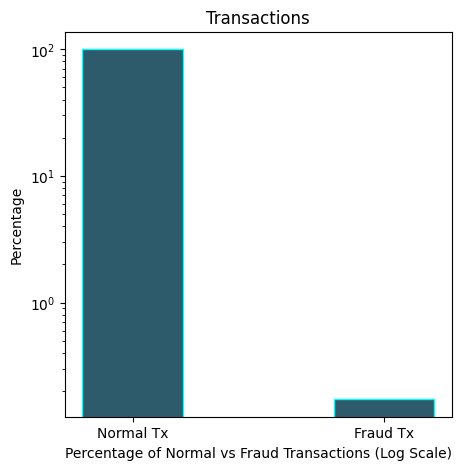

In [ ]:
## Bar Plot for Percentage fraudulent vs non-fraudulent
## Used Log Scale due to Highly Imbalanced data
fig = plt.figure(figsize = (5, 5))


# creating the bar plot
bars = ["Normal Tx", "Fraud Tx"]
values = [normal_share, fraud_share]
plt.bar(bars, values, color = "#2D5B6B", width = 0.4, edgecolor="cyan")

plt.xlabel("Percentage of Normal vs Fraud Transactions (Log Scale)")
plt.yscale('log')
plt.ylabel("Percentage")
plt.title("Transactions")
plt.show()


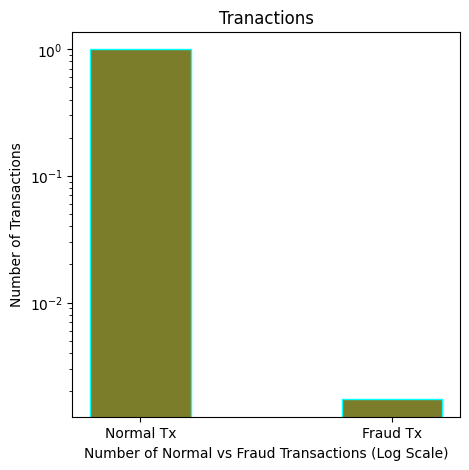

In [ ]:
## Bar Plot for count of fraudulent vs non-fraudulent
## Used Log Scale due to Highly Imbalanced data

fig = plt.figure(figsize = (5, 5))

# creating the bar plot
bars = ["Normal Tx", "Fraud Tx"]
values = [normal_share_num, fraud_share_num]
plt.bar(bars, values, color = "#7B7D2A", width = 0.4, edgecolor="cyan")

plt.xlabel("Number of Normal vs Fraud Transactions (Log Scale)")
plt.ylabel("Number of Transactions")
plt.yscale('log')
plt.title("Tranactions")
plt.show()


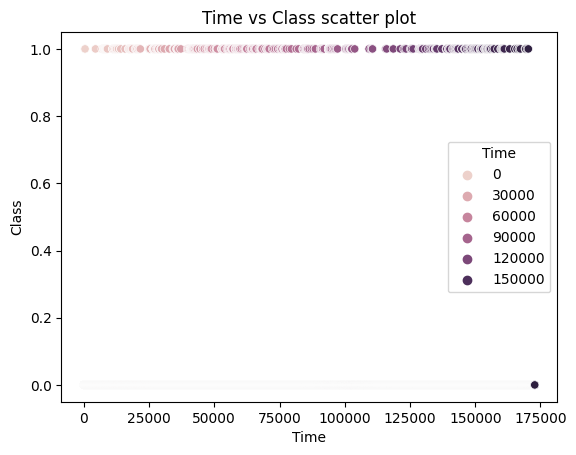

In [ ]:
## Scatter plot to observe the distribution of Class vs Time

sns.scatterplot(data = df, x="Time", y="Class", hue="Time")
plt.title("Time vs Class scatter plot")
plt.show()

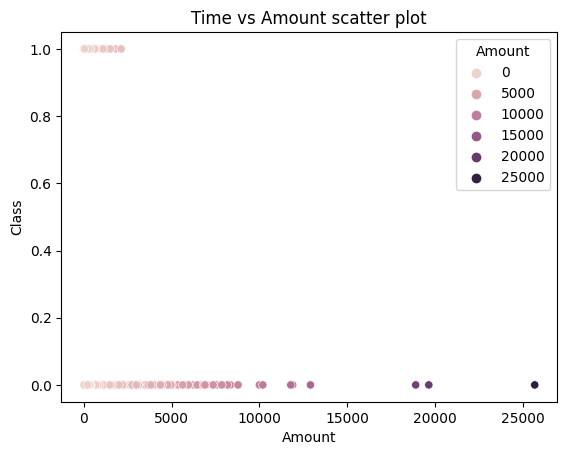

In [ ]:
## Scatter plot to observe the distribution of Class vs Amount

sns.scatterplot(data = df, x="Amount", y="Class", hue="Amount")
plt.title("Time vs Amount scatter plot")
plt.show()

<font color="BLUE" Size="5"> No specific insight can be drwan from the distribution of the fraudulent transaction <p>
<font color="RED" size="5"> Drop Time Feature as it doesn't add any value <p>

In [ ]:
df = df.drop("Time", axis = 1)

<font color="BLUE"> Plotting the distributions of all the featuers

<Figure size 640x480 with 0 Axes>

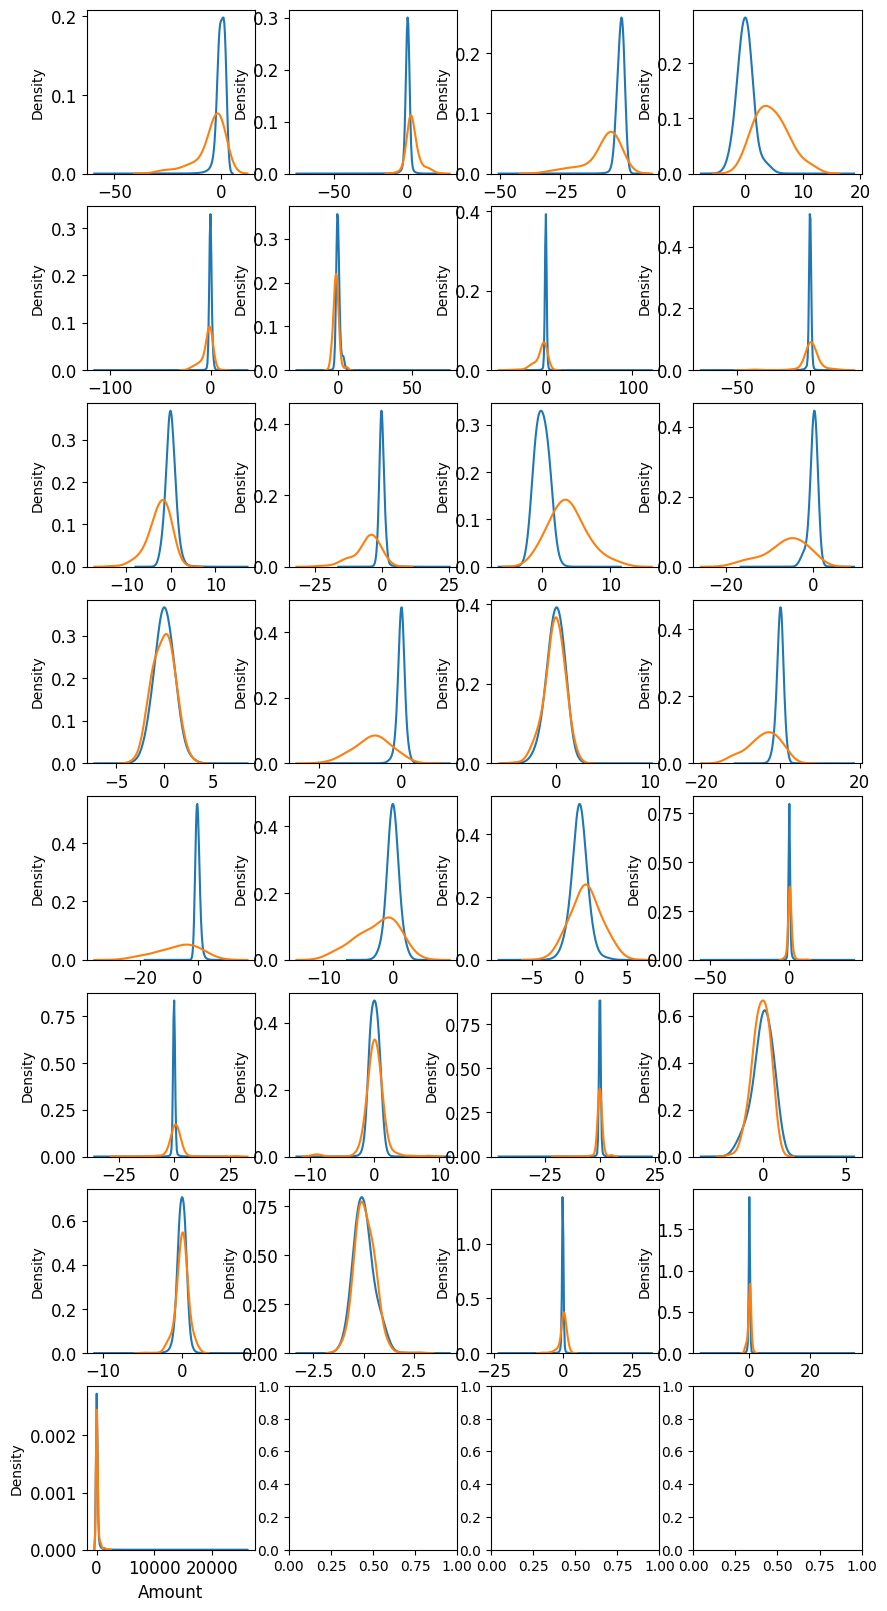

In [ ]:
# Plotting all the variable in displot to visualise the distribution
var = list(df.columns.values)
# dropping Class columns from the list
var.remove("Class")

i = 0
t0 = df.loc[df['Class'] == 0]
t1 = df.loc[df['Class'] == 1]

plt.figure()
fig, ax = plt.subplots(8,4,figsize=(10,20))

for feature in var:
    i += 1
    plt.subplot(8,4,i)
    sns.kdeplot(t0[feature], bw=0.5,label="0")
    sns.kdeplot(t1[feature], bw=0.5,label="1")
    plt.xlabel(feature, fontsize=12)
    locs, labels = plt.xticks()
    plt.tick_params(axis='both', which='major', labelsize=12)
plt.show();

<font color="Green" size="6"> Splitting the data into train & test data

In [ ]:
y= df["Class"]
X = df.drop("Class", axis = 1)
## Spltting the into 80:20 train test size
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 42)
## Checking the split of the class lable
print("Total Class Lables", np.sum(y))
print("Train Class Lables", np.sum(y_train))
print("Test Class Lables", np.sum(y_test))

Total Class Lables 492
Train Class Lables 394
Test Class Lables 98


<font color="BLUE" Size="5"> The dataset is PCA transformed </p>
<font color="BLUE" Size="5"> we need to scale the **Amount** field

In [ ]:
scaler = StandardScaler()

# Scaling the train data
X_train[["Amount"]] = scaler.fit_transform(X_train[["Amount"]])

# Transforming the test data
X_test[["Amount"]] = scaler.transform(X_test[["Amount"]])

In [ ]:
## Review the Training and Test Datafranes

X_train.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
223361,1.955041,-0.380783,-0.315013,0.330155,-0.509374,-0.086197,-0.627978,0.035994,1.054560,-0.030441,0.624996,1.691496,1.255790,-0.253266,-0.331695,0.307252,-0.930844,0.651666,0.167987,-0.125390,0.238197,0.968305,0.053208,-0.278602,-0.044999,-0.216780,0.045168,-0.047145,-0.307889
165061,-0.400975,-0.626943,1.555339,-2.017772,-0.107769,0.168310,0.017959,-0.401619,0.040378,0.611115,-1.945070,-0.726597,1.060888,-1.193347,0.631053,-0.160123,-1.630444,2.106866,-1.692780,-0.470372,-0.153485,0.421703,0.113442,-1.004095,-1.176695,0.361924,-0.370469,-0.144792,-0.167026
238186,0.072509,0.820566,-0.561351,-0.709897,1.080399,-0.359429,0.787858,0.117276,-0.131275,-0.638222,0.521931,-0.072768,-1.008237,-0.640249,-0.801946,0.678131,0.044374,0.521919,0.198772,0.012227,-0.314638,-0.872959,0.083391,0.148178,-0.431459,0.119690,0.206395,0.070288,-0.300043
150562,-0.535045,1.014587,1.750679,2.769390,0.500089,1.002270,0.847902,-0.081323,0.371579,0.560595,-0.855437,-4.179628,0.286872,1.271254,-1.011647,1.458600,-0.613260,0.814931,-2.147124,-0.253757,0.063525,0.443431,-0.072754,0.448192,-0.655203,-0.181038,-0.093013,-0.064931,0.113600
138452,-4.026938,1.897371,-0.429786,-0.029571,-0.855751,-0.480406,-0.435632,1.313760,0.536044,1.221746,0.472626,1.595929,0.777603,0.187685,-1.060579,0.143332,0.007803,-0.055817,0.712695,-0.012320,-0.480691,-0.230369,0.250717,0.066399,0.470787,0.245335,0.286904,-0.322672,-0.246029


In [ ]:
X_test.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,-14.110184,5.299236,-10.834006,1.671120,-9.373859,0.360806,-9.899247,-19.236292,-8.398552,3.101735,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,1.081514
49906,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,-0.565012,-0.087670,0.979427,0.076883,-0.217884,-0.136830,-2.142892,0.126956,1.752662,0.432546,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,1.693173
29474,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,0.756801,0.543827,0.112453,1.075384,-0.245772,0.180483,1.769860,-0.533172,-0.533300,1.192245,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,-0.225474
276481,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,-1.376648,-1.328335,0.223621,1.132627,-0.550875,0.616568,0.497974,0.502195,0.981343,0.101264,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,-0.341192
278846,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,0.259452,0.942162,0.850038,-0.616166,0.592634,-0.603845,0.091077,-0.471867,-0.333816,0.404711,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,-0.343585


<font color="BLUE" Size="5"> Preserve **X_test & y_test** to evaluate on the test data once you build the model

In [ ]:
print(np.sum(y))
print(np.sum(y_train))
print(np.sum(y_test))

492
394
98


<font color="GREEN" Size="5"> SKWENESS

<font color="BLUE" Size="5">
If there is skewness present in the distribution use- <b>Power Transformer</b> package present in the <b>preprocessing library provided by sklearn</b> to make distribution more gaussian

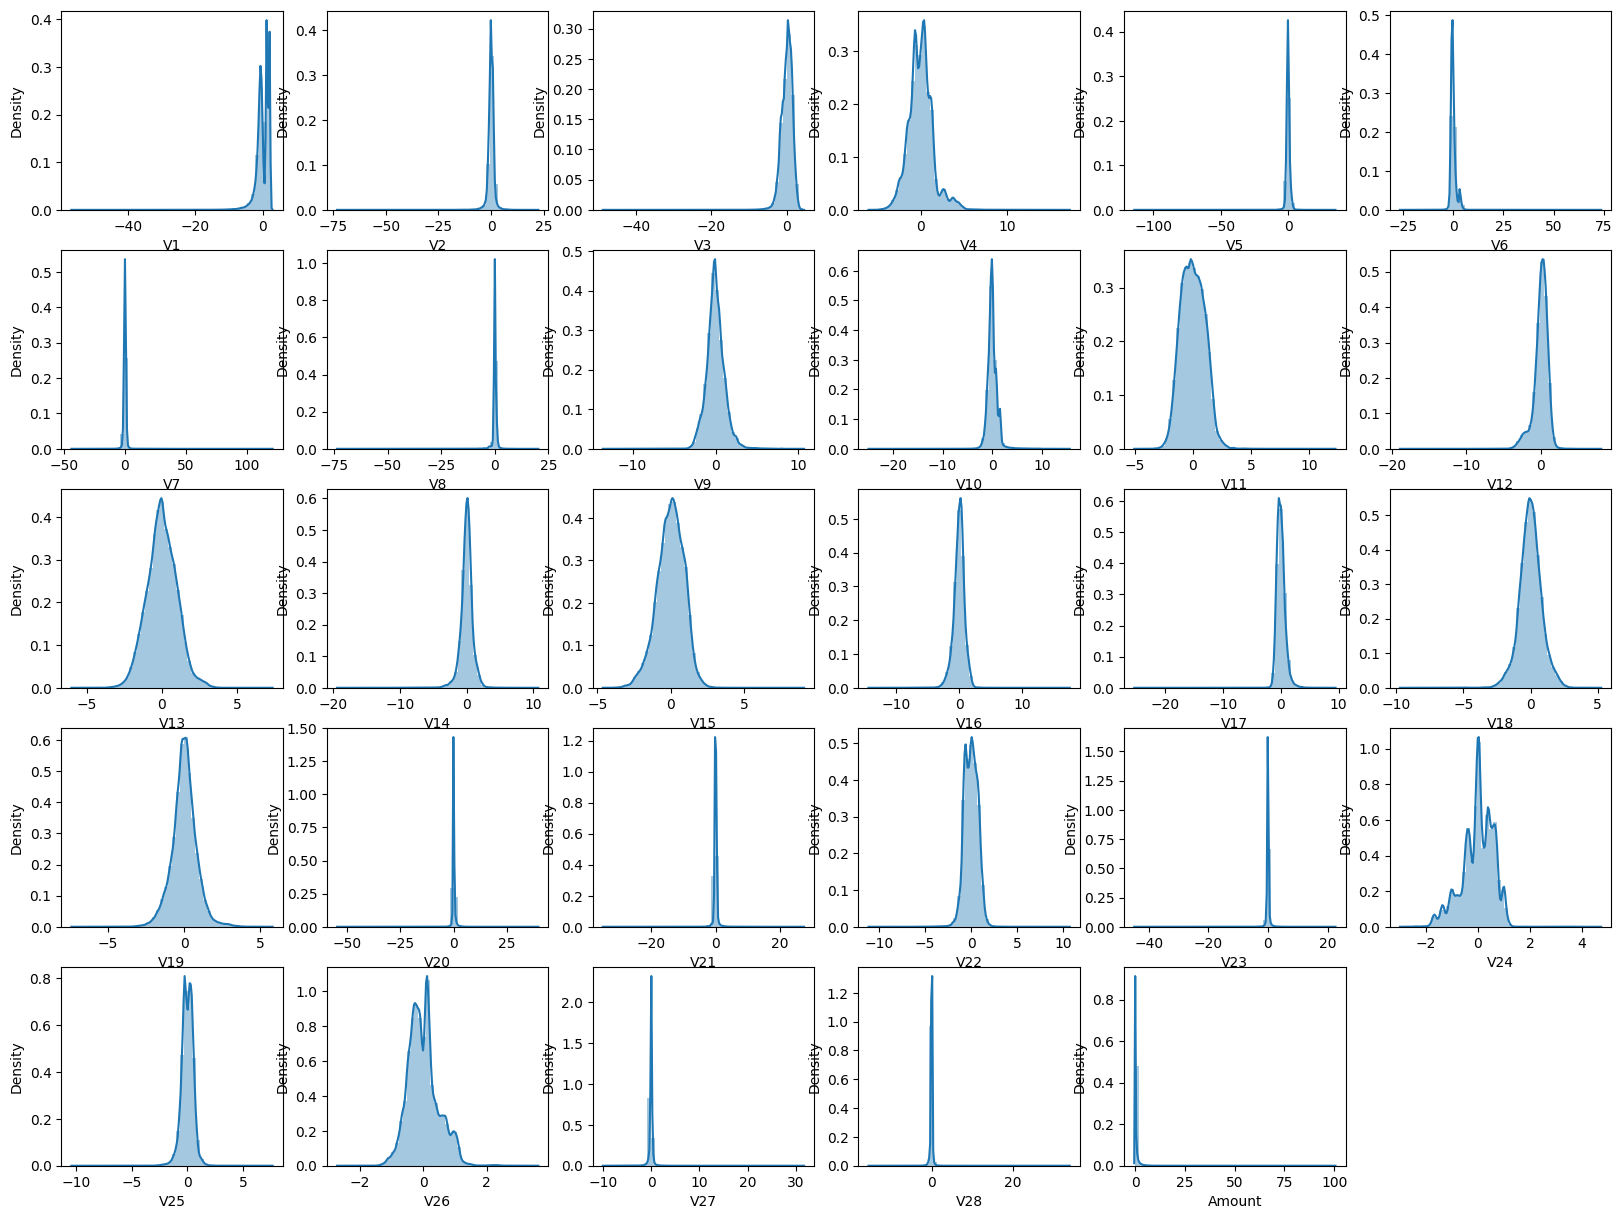

In [ ]:
# plot the histogram of a variable from the dataset to see the skewness
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

In [ ]:
# - Apply : preprocessing.PowerTransformer(copy=False) to fit & transform the train & test data

# Lets check the skewness of the features
var = X_train.columns
skew_list = []
for i in var:
    skew_list.append(X_train[i].skew())

tmp = pd.concat([pd.DataFrame(var, columns=["Features"]), pd.DataFrame(skew_list, columns=["Skewness"])], axis=1)
tmp.set_index("Features", inplace=True)
tmp.T

Features,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
Skewness,-3.320269,-4.826847,-2.219375,0.677776,-2.928646,1.977725,3.74462,-8.445014,0.543603,1.212102,0.359527,-2.281334,0.067612,-1.992812,-0.308053,-1.113875,-3.975821,-0.266115,0.107289,-1.977859,3.656863,-0.230008,-6.285467,-0.552668,-0.417168,0.579265,-0.03833,11.776522,18.352356


In [ ]:
## Create list of features that are skewed (<-1 / > +1c)
skewed = tmp.loc[(tmp["Skewness"] > 1) | (tmp["Skewness"] <-1 )].index
skewed

Index(['V1', 'V2', 'V3', 'V5', 'V6', 'V7', 'V8', 'V10', 'V12', 'V14', 'V16',
       'V17', 'V20', 'V21', 'V23', 'V28', 'Amount'],
      dtype='object', name='Features')

In [ ]:
## Apply power transform for the train & test data
pt = PowerTransformer(copy=False)

## Applying the power transformer to train data
X_train[skewed] = pt.fit_transform(X_train[skewed])


## Applying the power transformer to train data
X_test[skewed] = pt.transform(X_test[skewed])

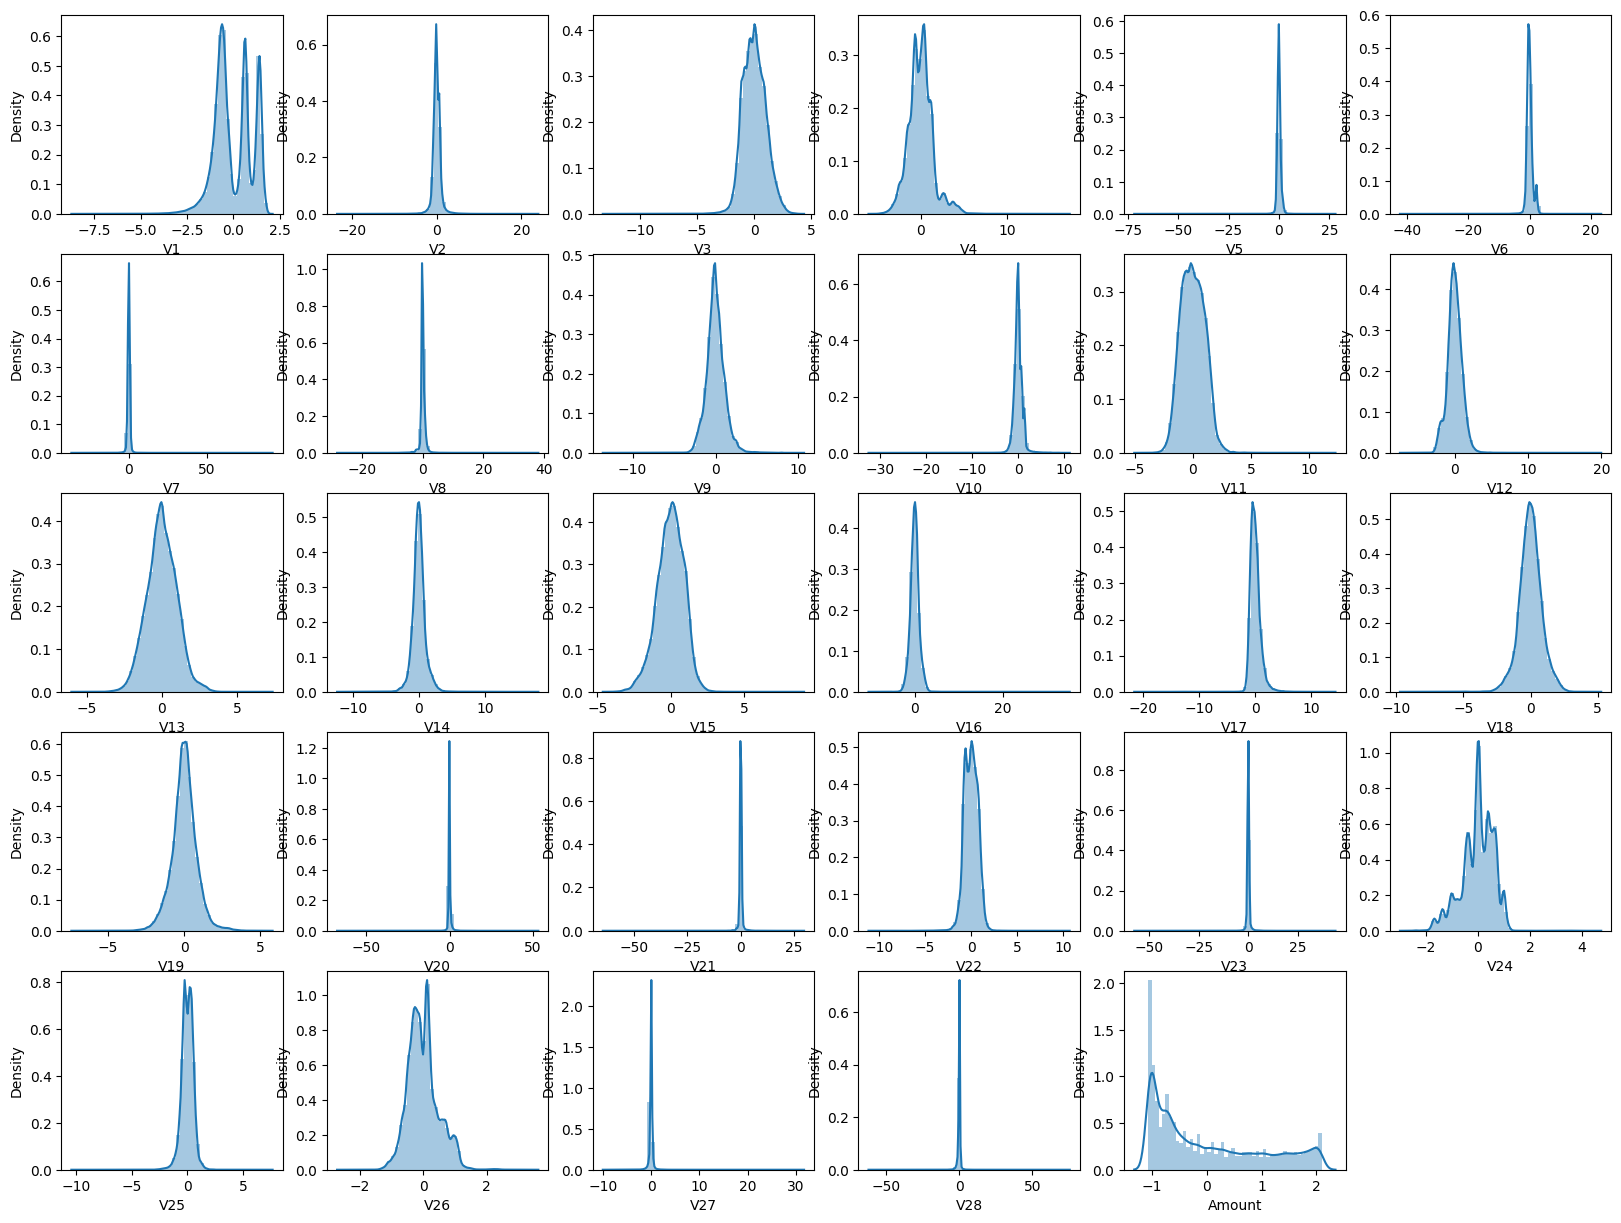

In [ ]:
## Plot the Histogram of a features to review the transformed data
var = X_train.columns

plt.figure(figsize=(20,15))
i=0
for col in var:
    i += 1
    plt.subplot(5,6, i)
    sns.distplot(X_train[col])

plt.show()

<font color="GREEN" size="5"> Model Building with imbalanced data </font>

<font color="BLUE" size="5"> Build models for these algorithms **1. Logistic Regression 2. Decision Tree 3. XGBoost** <p>
<font color="BLUE" size="5"> Following models may be evaluated later if good perfomance is not high (satisfactory) as they are computationally expensive 1. SVM 2. RandomForest

In [ ]:
## Logistic Regression parameters for K-fold cross vaidation
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}
folds = KFold(n_splits=5, shuffle=True, random_state=4)


## Cross validation
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        n_jobs=-1,
                        verbose = 1,
                        return_train_score=True)
## hyperparameter tuning
model_cv.fit(X_train, y_train)

## Output of the evaluation result
print('Best ROC AUC score: ', model_cv.best_score_)

## Output of the best hyperparametes
print('Best hyperparameters: ', model_cv.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9808868419804181
Best hyperparameters:  {'C': 0.01}


In [ ]:
## Cross Validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.873871,0.035542,0.024436,0.004102,0.01,{'C': 0.01},0.968649,0.987418,0.991888,0.972320,0.984158,0.980887,0.008917,1,0.986560,0.981838,0.980641,0.986508,0.981480,0.983405,0.002584
1,1.331444,0.108829,0.031172,0.007982,0.1,{'C': 0.1},0.969796,0.982755,0.988625,0.964694,0.980026,0.977179,0.008725,2,0.983257,0.978596,0.977881,0.985034,0.979206,0.980795,0.002824
2,1.714748,0.333097,0.026398,0.009213,1,{'C': 1},0.970928,0.981696,0.987179,0.962764,0.978303,0.976174,0.008526,3,0.982013,0.977514,0.977196,0.984493,0.978452,0.979934,0.002851
3,1.421130,0.044834,0.022460,0.000475,10,{'C': 10},0.971130,0.981564,0.986990,0.962537,0.978079,0.976060,0.008497,4,0.981847,0.977373,0.977123,0.984424,0.978355,0.979824,0.002854
4,1.451053,0.037319,0.030276,0.016306,100,{'C': 100},0.971157,0.981549,0.986970,0.962509,0.978058,0.976048,0.008495,5,0.981831,0.977356,0.977118,0.984419,0.978347,0.979814,0.002854
5,2.201516,0.260283,0.038173,0.011766,1000,{'C': 1000},0.971160,0.981549,0.986964,0.962506,0.978055,0.976047,0.008494,6,0.981829,0.977357,0.977113,0.984418,0.978345,0.979812,0.002855


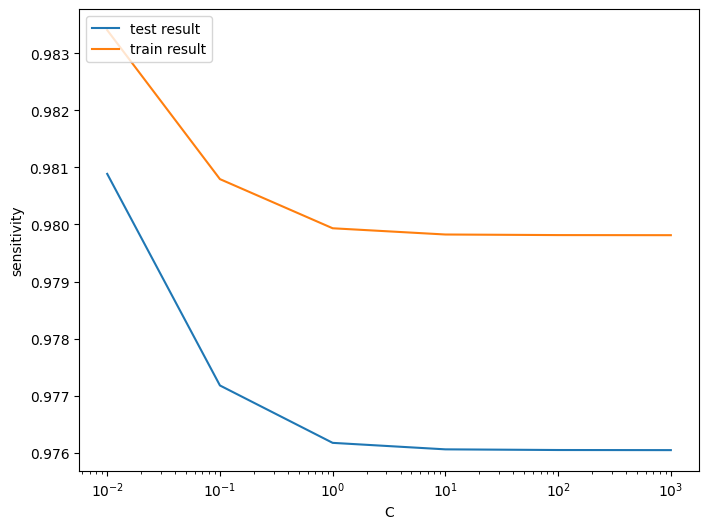

In [ ]:
## C Vs. Train and Validation scores
plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:

## Logistic Regression with optimal C

## Instantiating the model with best C
log_reg_imb_model = LogisticRegression(C=0.01)

## Fitting the model on train dataset
log_reg_imb_model.fit(X_train, y_train)

LogisticRegression(C=0.01)

In [ ]:
## Prediction and model evalution on the train set
# Creating function to display ROC-AUC score, f1 score and classification report
def display_scores(y_test, y_pred):
    '''
    Display ROC-AUC score, f1 score and classification report of a model.
    '''
    print(f"F1 Score: {round(f1_score(y_test, y_pred)*100,2)}%")
    print(f"Classification Report: \n {classification_report(y_test, y_pred)}")

In [ ]:
y_train_pred = log_reg_imb_model.predict(X_train)

In [ ]:
display_scores(y_train, y_train_pred)

F1 Score: 73.76%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.90      0.62      0.74       394

    accuracy                           1.00    227845
   macro avg       0.95      0.81      0.87    227845
weighted avg       1.00      1.00      1.00    227845



In [ ]:
# ROC Curve function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [ ]:
## Predicted probability
y_train_pred_proba = log_reg_imb_model.predict_proba(X_train)[:,1]

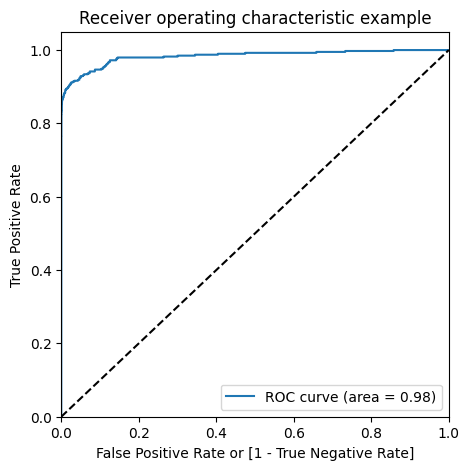

In [ ]:
## Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [ ]:
##Evaluating the model on the test set
y_test_pred = log_reg_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 70.3%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.87      0.59      0.70        98

    accuracy                           1.00     56962
   macro avg       0.93      0.80      0.85     56962
weighted avg       1.00      1.00      1.00     56962



In [ ]:
# Predicted probability
y_test_pred_proba = log_reg_imb_model.predict_proba(X_test)[:,1]

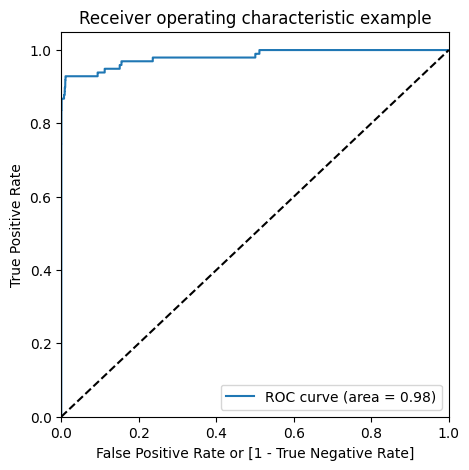

In [ ]:
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<font color="Green" size="6">  Model Summary

### Train set
- ROC : 98%
- F1 Score: 73.76%

### Test set
- ROC : 98%
- F1 score: 70.3%

<font color="Green" Size="5"> Decision Tree

In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,5.298211,0.401729,0.041317,0.013458,5,50,50,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.905066,0.927341,0.951701,0.928036,0.019045,7
1,4.910684,0.554269,0.029913,0.001040,5,50,100,"{'max_depth': 5, 'min_samples_leaf': 50, 'min_...",0.905066,0.927341,0.951705,0.928038,0.019047,6
2,5.528328,0.693778,0.027839,0.001125,5,100,50,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,1
3,4.592144,0.037094,0.030649,0.003793,5,100,100,"{'max_depth': 5, 'min_samples_leaf': 100, 'min...",0.922268,0.927130,0.952111,0.933836,0.013073,1
4,10.398848,0.038169,0.031914,0.000883,10,50,50,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.942313,0.923851,0.915696,0.927287,0.011135,8
5,10.467372,0.178829,0.034066,0.002772,10,50,100,"{'max_depth': 10, 'min_samples_leaf': 50, 'min...",0.942327,0.931259,0.915717,0.929768,0.010914,5
6,9.561604,0.679712,0.042884,0.016709,10,100,50,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.948450,0.930664,0.915644,0.931586,0.013409,4
7,10.203335,0.234303,0.028127,0.005844,10,100,100,"{'max_depth': 10, 'min_samples_leaf': 100, 'mi...",0.948463,0.930678,0.915628,0.931589,0.013421,3


In [ ]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9338362614319525
DecisionTreeClassifier(max_depth=5, min_samples_leaf=100, min_samples_split=50)


In [ ]:
## Decision Tree with optimal hyperparameters
# Model with optimal hyperparameters
dt_imb_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_imb_model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

In [ ]:
## Prediction on the train set
y_train_pred = dt_imb_model.predict(X_train)
display_scores(y_train, y_train_pred)

F1 Score: 72.33%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       0.77      0.68      0.72       394

    accuracy                           1.00    227845
   macro avg       0.89      0.84      0.86    227845
weighted avg       1.00      1.00      1.00    227845



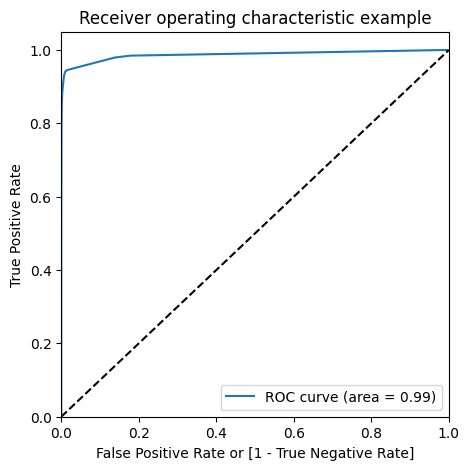

In [ ]:
# Predicted probability
y_train_pred_proba = dt_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba)

In [ ]:
## Evaluating the model on the test set
y_test_pred = dt_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 71.88%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.70      0.72        98

    accuracy                           1.00     56962
   macro avg       0.87      0.85      0.86     56962
weighted avg       1.00      1.00      1.00     56962



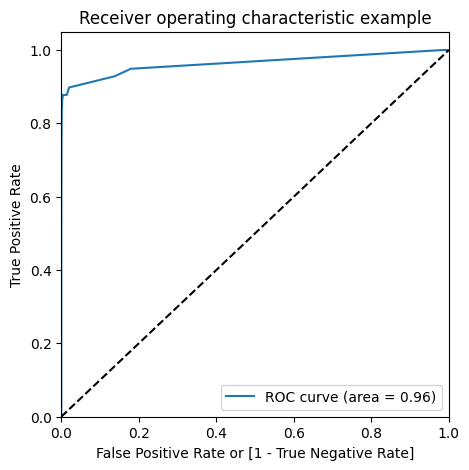

In [ ]:
# Predicted probability
y_test_pred_proba = dt_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<font color="Green" size="6"> Model Summary

Train set
- ROC Score: 99%
-  F1 score : 72.33% <p> </fomt>

Test set
- ROC Score: 96%
- F1 score : 71.88%

</font>

<font color="Green" Size="5"> XGBoost

In [ ]:
# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,30.084823,0.871560,0.110729,0.001234,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.972622,0.973489,0.977180,0.974430,0.001976,3,0.999683,0.999816,0.999653,0.999717,0.000071
1,46.274134,1.386604,0.112091,0.002777,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.978473,0.973756,0.985640,0.979289,0.004886,2,0.999955,0.999963,0.999896,0.999938,0.000030
2,55.585404,1.057903,0.146935,0.047612,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.982187,0.971895,0.988788,0.980957,0.006951,1,0.999910,0.999895,0.999912,0.999906,0.000008
3,29.047259,0.603251,0.112738,0.004780,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.969916,0.944005,0.980199,0.964706,0.015228,6,0.999995,0.999990,0.999929,0.999971,0.000030
4,46.834384,2.088548,0.116867,0.003999,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.967480,0.967639,0.982626,0.972582,0.007103,4,1.000000,1.000000,1.000000,1.000000,0.000000
5,57.615409,1.830988,0.118307,0.007837,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.976386,0.956182,0.984677,0.972415,0.011967,5,1.000000,1.000000,1.000000,1.000000,0.000000


In [ ]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9809566569367213
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.2, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [ ]:
# Printing best params
model_cv.best_params_

{'learning_rate': 0.2, 'subsample': 0.9}

In [ ]:
## XGBoost model with optimal hyperparameter
# Printing best params
params = {'learning_rate': 0.2,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# fit model on training data
xgb_imb_model = XGBClassifier(params = params)
xgb_imb_model.fit(X_train, y_train)

[20:59:05] WARNING: ../src/learner.cc:767: 
Parameters: { "params" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              params={'learning_rate': 0.2, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor=None, ...)

In [ ]:
## Model evaluation on train set
# Predictions on the train set
y_train_pred = xgb_imb_model.predict(X_train)

display_scores(y_train, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00       394

    accuracy                           1.00    227845
   macro avg       1.00      1.00      1.00    227845
weighted avg       1.00      1.00      1.00    227845



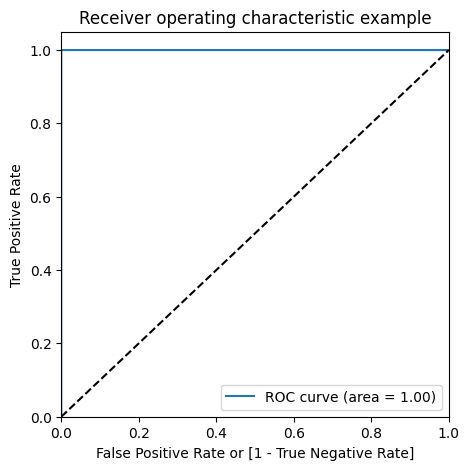

In [ ]:
# Predicted probability
y_train_pred_proba_imb_xgb = xgb_imb_model.predict_proba(X_train)[:,1]

# Plot the ROC curve
draw_roc(y_train, y_train_pred_proba_imb_xgb)

In [ ]:
## Evaluating the model on the test set
# Predictions on the test set
y_test_pred = xgb_imb_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 88.27%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.98      0.81      0.88        98

    accuracy                           1.00     56962
   macro avg       0.99      0.90      0.94     56962
weighted avg       1.00      1.00      1.00     56962



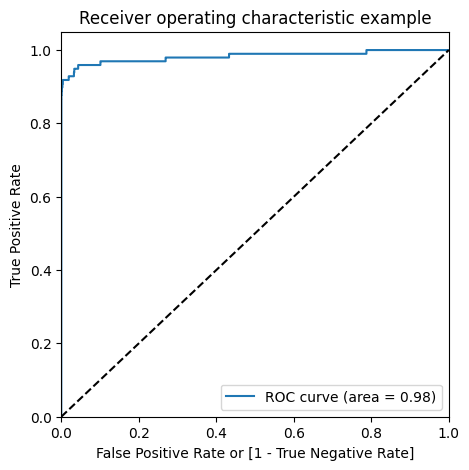

In [ ]:
# Predicted probability
y_test_pred_proba = xgb_imb_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<font color="Green" size="6"> Model Summary

### Train set
- ROC score: 100%
- F1 score: 100.0%

### Test set
- ROC score: 98%
- F1 score: 88.27%


<font color="Blue" Size="5"> XGBoost model is giving good performance on the unbalanced data among these 3 models. ROC-AUC score on the train data is 100% and on test data 98%.

<font color="Green" Size="4"> Print the important features of the best model to understand the dataset
This will not give much explanation on the already transformed dataset
But it will help us in understanding if the dataset is not PCA transformed

Top var = 17
2nd Top var = 14
3rd Top var = 10


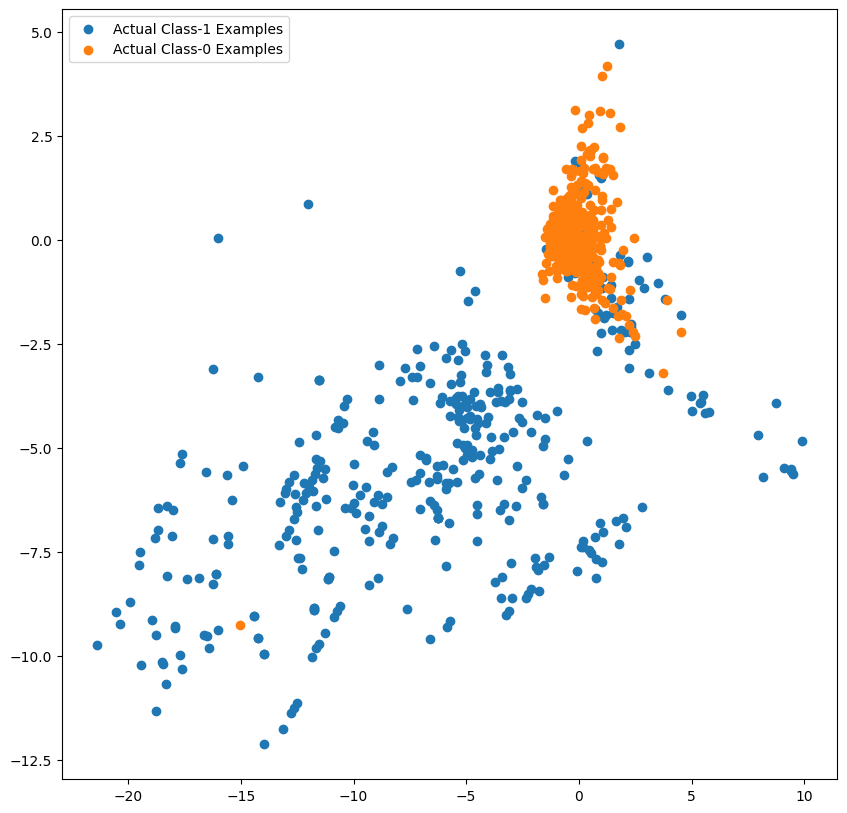

In [ ]:
var_imp = []
for i in xgb_imb_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-3])+1)

# Variable on Index-16 and Index-13 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_imb_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [10, 10]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
## Print the FPR,TPR & select the best threshold from the roc curve for the best model
print('Train auc =', metrics.roc_auc_score(y_train, y_train_pred_proba_imb_xgb))
fpr, tpr, thresholds = metrics.roc_curve(y_train, y_train_pred_proba_imb_xgb)
threshold = thresholds[np.argmax(tpr-fpr)]
print("Threshold=",threshold)

Train auc = 1.0
Threshold= 0.87439483


<font color="Green" Size="6"> Model building with balancing Classes
* Random Oversampling
* SMOTE
* ADASYN

In [ ]:
## Random Oversampling
from imblearn.over_sampling import RandomOverSampler

# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_over, y_over = oversample.fit_resample(X_train, y_train)

In [ ]:
from collections import Counter
# Befor sampling class distribution
print('Before sampling class distribution:-',Counter(y_train))
# new class distribution
print('New class distribution:-',Counter(y_over))

Before sampling class distribution:- Counter({0: 227451, 1: 394})
New class distribution:- Counter({0: 227451, 1: 227451})


In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_over, y_over)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9868609998355234
Best hyperparameters:  {'C': 100}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.147081,0.346517,0.043961,0.013674,0.01,{'C': 0.01},0.985757,0.986802,0.987415,0.986681,0.986885,0.986708,0.000538,6,0.986948,0.986694,0.986526,0.986730,0.986728,0.986725,0.000134
1,2.258248,0.439318,0.047437,0.017886,0.1,{'C': 0.1},0.985893,0.986938,0.987557,0.986820,0.987022,0.986846,0.000539,5,0.987084,0.986829,0.986657,0.986861,0.986866,0.986860,0.000136
2,2.263189,0.491586,0.041789,0.007586,1,{'C': 1},0.985909,0.986948,0.987569,0.986834,0.987040,0.986860,0.000538,4,0.987099,0.986846,0.986671,0.986875,0.986881,0.986874,0.000136
3,2.055112,0.422998,0.043249,0.014017,10,{'C': 10},0.985909,0.986949,0.987570,0.986836,0.987041,0.986861,0.000538,3,0.987100,0.986848,0.986673,0.986876,0.986882,0.986876,0.000136
4,2.064453,0.146483,0.045394,0.016077,100,{'C': 100},0.985909,0.986949,0.987570,0.986836,0.987041,0.986861,0.000538,1,0.987100,0.986848,0.986673,0.986876,0.986883,0.986876,0.000136
5,2.189781,0.433144,0.040008,0.001153,1000,{'C': 1000},0.985909,0.986949,0.987570,0.986835,0.987041,0.986861,0.000538,2,0.987100,0.986848,0.986673,0.986876,0.986883,0.986876,0.000136


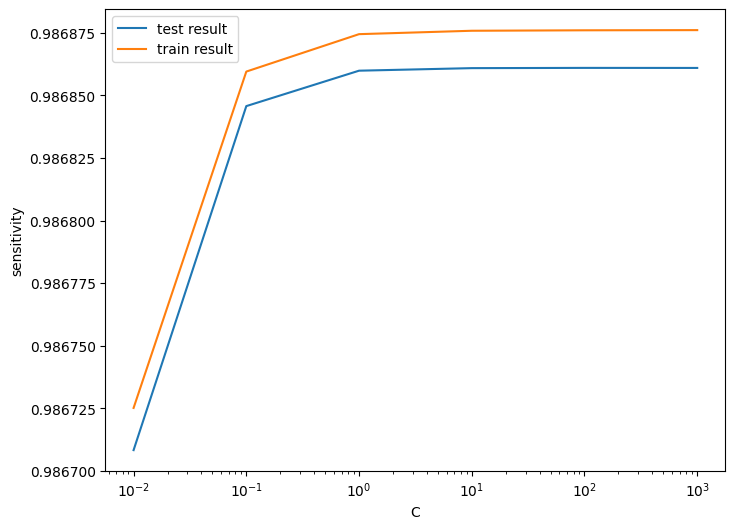

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
## Best parameter
model_cv.best_params_

{'C': 100}

In [ ]:
# Instantiating the model
logreg_over = LogisticRegression(C=1000)

# Fitting the model with train data
logreg_over_model = logreg_over.fit(X_over, y_over)

In [ ]:
# Predictions on the train set
y_train_pred = logreg_over_model.predict(X_over)

In [ ]:
# Printing scores
display_scores(y_over, y_train_pred)

F1 Score: 94.23%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.95      0.94      0.94    454902
weighted avg       0.95      0.94      0.94    454902



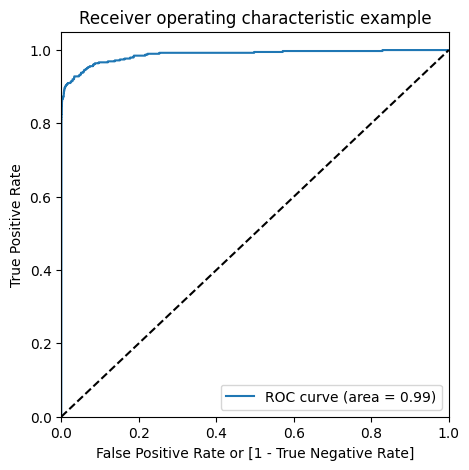

In [ ]:
# Predicted probability
y_train_pred_proba = logreg_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

In [ ]:
# Evaluating on test data
y_test_pred = logreg_over_model.predict(X_test)

# Printing the scores
display_scores(y_test, y_test_pred)

F1 Score: 10.35%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.95      0.54     56962
weighted avg       1.00      0.97      0.98     56962



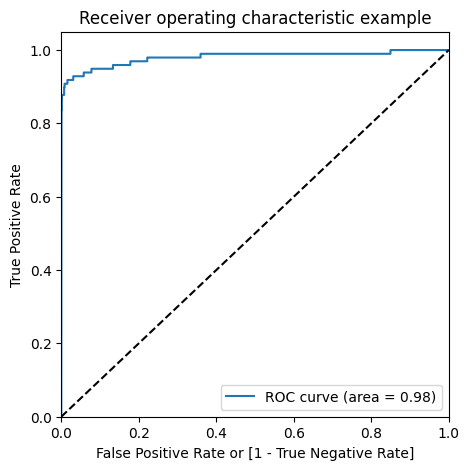

In [ ]:
# Predicted probability
y_test_pred_proba = logreg_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Model Summary
Train set
ROC score : 99%
F1 score: 94.34%
Test set
ROC score : 98%
F1 score: 10.54%

<font color="Green" Size="5"> Decision Tree with Random Oversampling


In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_over,y_over)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9987140431480173
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [ ]:
# Model with optimal hyperparameters
dt_over_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=100,
                                  min_samples_split=100)

dt_over_model.fit(X_over, y_over)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=100,
                       min_samples_split=100, random_state=100)

In [ ]:
## Model evatuation on train data
# Predictions on the train set
y_train_pred = dt_over_model.predict(X_over)
display_scores(y_over, y_train_pred)

F1 Score: 99.44%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      0.99    227451
           1       0.99      1.00      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



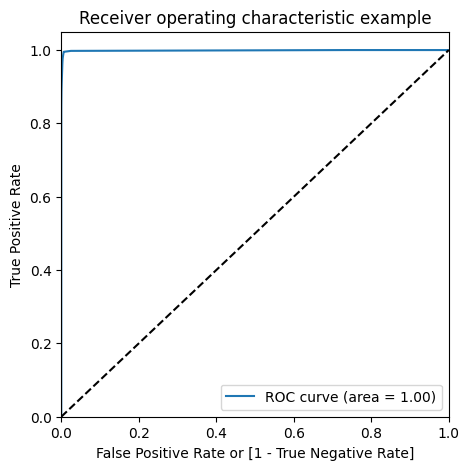

In [ ]:
# Predicted probability
y_train_pred_proba = dt_over_model.predict_proba(X_over)[:,1]
# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

In [ ]:
## Predictions on the test set
# Evaluating model on the test data
y_test_pred = dt_over_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 29.57%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.99      1.00     56864
           1       0.18      0.82      0.30        98

    accuracy                           0.99     56962
   macro avg       0.59      0.90      0.65     56962
weighted avg       1.00      0.99      1.00     56962



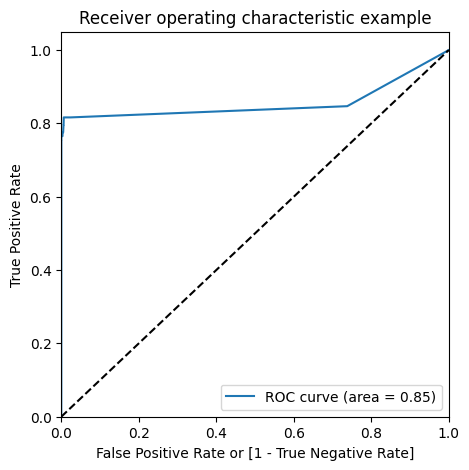

In [ ]:
# Predicted probability
y_test_pred_proba = dt_over_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)



<font color="Green" size="6">  Model Summary

### Train set
- ROC score : 100%
- F1 score: 99.43%

### Test set
- ROC score : 85%
- F1 score: 28.83%

<font color = "Green" size="5">XGBoost with Random Oversampling

In [ ]:
# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_over, y_over)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
from numpy import nan

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, gamma=None,
                                     gpu_id=None, importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=None, max_delta_step=None,
                                     max_depth=2, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, random_state=None,
                                     reg_alpha=None, reg_lambda=None,
                                     scale_pos_weight=None, subsample=None,
                                     tree_method=None, validate_parameters=None,
                                     verbosity=None),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type='gain',
                                     interaction_constraints=None,
                                     learning_rate=Non...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,54.817424,0.553468,0.277073,0.079229,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999879,0.999890,0.999875,0.999881,6.316831e-06,6,0.999886,0.999896,0.999901,0.999894,0.000006
1,72.385515,1.136950,0.202293,0.001349,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999884,0.999893,0.999881,0.999886,5.130724e-06,5,0.999902,0.999905,0.999905,0.999904,0.000001
2,78.428069,0.820711,0.238177,0.041882,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999890,0.999891,0.999888,0.999890,1.368286e-06,4,0.999901,0.999893,0.999907,0.999901,0.000006
3,52.512549,0.669640,0.207180,0.004025,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999974,0.999969,0.999982,0.999975,5.004301e-06,3,0.999995,0.999989,0.999996,0.999993,0.000003
4,69.680228,1.462918,0.199561,0.005046,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999987,0.999978,0.999987,0.999984,4.266552e-06,2,0.999999,0.999996,0.999996,0.999997,0.000001
5,78.355916,1.174580,0.262103,0.093617,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999984,0.999985,0.999984,0.999984,4.806451e-07,1,1.000000,0.999998,0.999996,0.999998,0.000002


In [ ]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999841368795037
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [ ]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [ ]:
## XGBoost with optimal hyperparameter
# chosen hyperparameters
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
         'objective':'binary:logistic'}

# fit model on training data
xgb_over_model = XGBClassifier(params = params)
xgb_over_model.fit(X_over, y_over)

[21:28:53] WARNING: ../src/learner.cc:767: 
Parameters: { "params" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor=None, ...)

In [ ]:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=0, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor=None, ...)

In [ ]:
## Model evatuation on train data
# Predictions on the train set
y_train_pred = xgb_over_model.predict(X_over)

display_scores(y_over, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



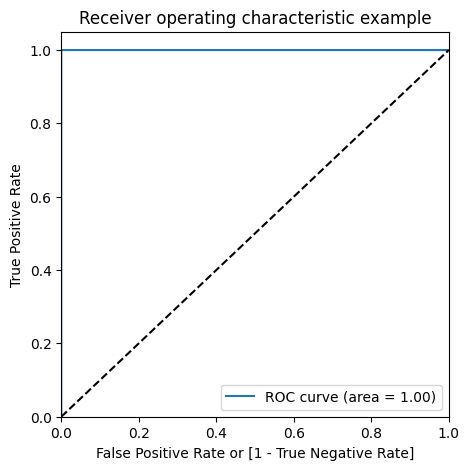

In [ ]:
# Predicted probability
y_train_pred_proba = xgb_over_model.predict_proba(X_over)[:,1]

# Plot the ROC curve
draw_roc(y_over, y_train_pred_proba)

In [ ]:
## Model evaluation on the test set
y_pred = xgb_over_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 89.73%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.95      0.85      0.90        98

    accuracy                           1.00     56962
   macro avg       0.98      0.92      0.95     56962
weighted avg       1.00      1.00      1.00     56962



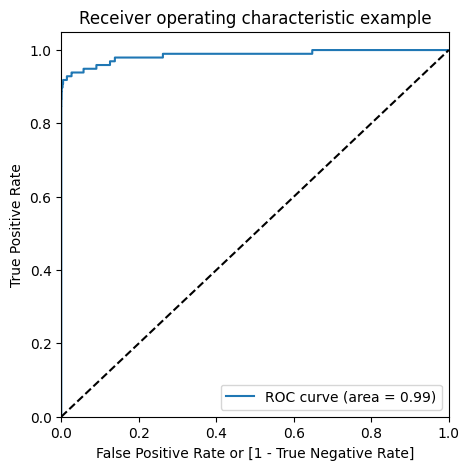

In [ ]:
# Predicted probability
y_test_pred_proba = xgb_over_model.predict_proba(X_test)[:,1]

# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

Model Summary
Train set
ROC score : 100.0%
F1 score: 100.0%
Test set
ROC score : 98%
F1 score: 89.01%

<font color = "Green" size="5"> SMOTE (Synthetic Minority Oversampling Technique)

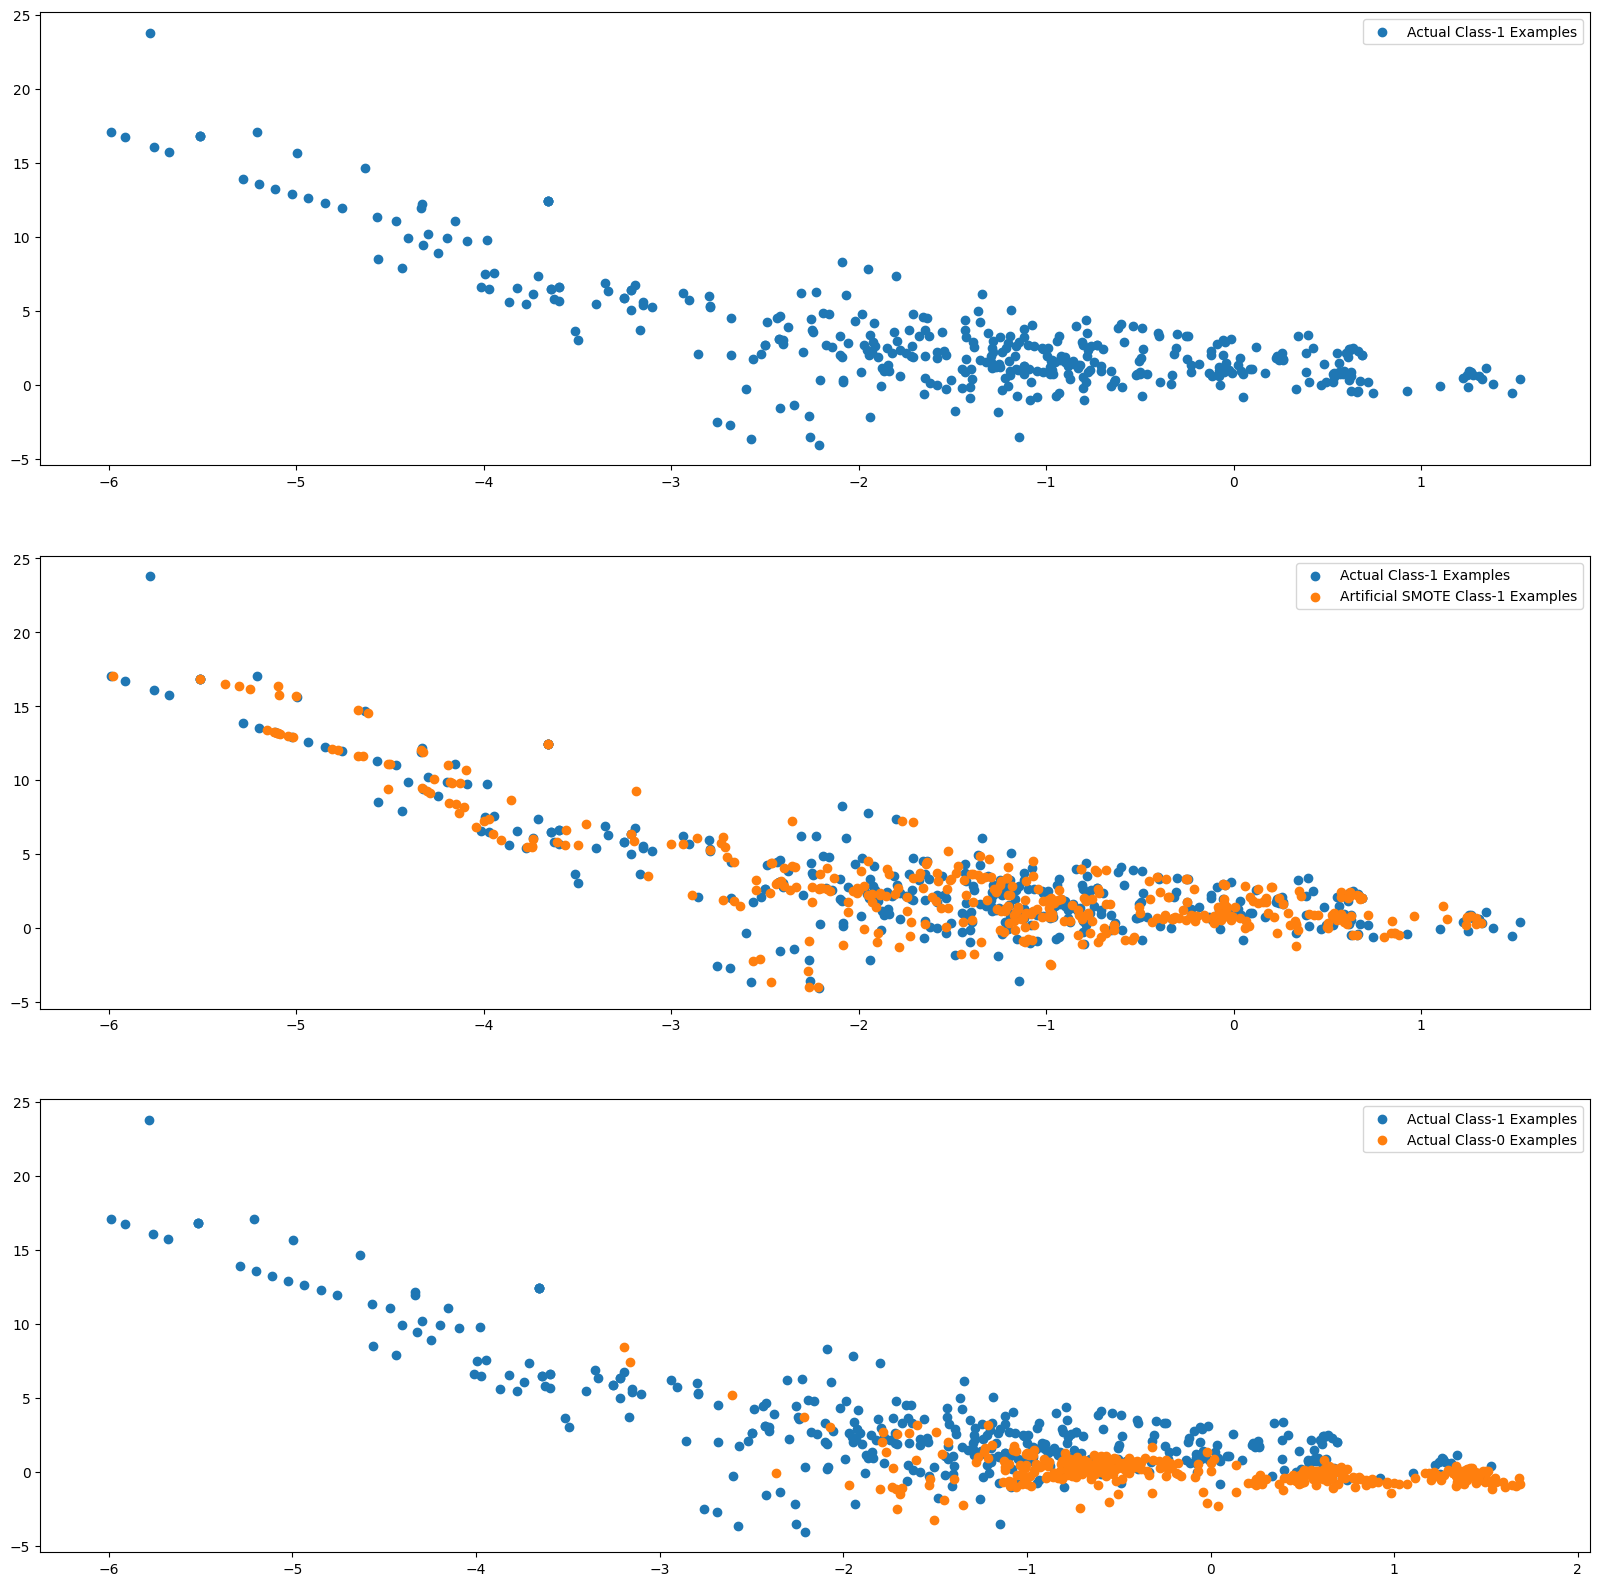

In [ ]:
## Aply SMOTE and Print Distribution
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=0)
X_train_smote, y_train_smote = sm.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from SMOTE are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from SMOTE, we do
X_train_smote_1 = X_train_smote[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]


plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_smote_1.iloc[:X_train_1.shape[0], 0], X_train_smote_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial SMOTE Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

<font color="green" size = "5">Logistic Regression on balanced data with SMOTE

In [ ]:
# Creating KFold object with 5 splits
folds = KFold(n_splits=5, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_smote, y_train_smote)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best ROC AUC score:  0.9889852511786869
Best hyperparameters:  {'C': 100}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.074016,0.467586,0.046028,0.014516,0.01,{'C': 0.01},0.988651,0.989120,0.989007,0.988704,0.988881,0.988873,0.000177,6,0.988979,0.988788,0.988797,0.988914,0.988955,0.988887,0.00008
1,1.999256,0.206644,0.046781,0.016266,0.1,{'C': 0.1},0.988757,0.989219,0.989093,0.988807,0.988993,0.988974,0.000173,5,0.989079,0.988894,0.988893,0.989012,0.989060,0.988987,0.00008
2,2.166229,0.318622,0.037845,0.001069,1,{'C': 1},0.988768,0.989229,0.989101,0.988817,0.989005,0.988984,0.000172,4,0.989089,0.988905,0.988903,0.989022,0.989071,0.988998,0.00008
3,2.238872,0.463251,0.038766,0.001930,10,{'C': 10},0.988769,0.989230,0.989102,0.988818,0.989006,0.988985,0.000172,3,0.989090,0.988906,0.988905,0.989023,0.989072,0.988999,0.00008
4,2.204514,0.269713,0.045875,0.012404,100,{'C': 100},0.988769,0.989230,0.989102,0.988818,0.989006,0.988985,0.000172,1,0.989090,0.988906,0.988905,0.989023,0.989072,0.988999,0.00008
5,2.430575,0.611326,0.046736,0.019231,1000,{'C': 1000},0.988769,0.989230,0.989102,0.988818,0.989006,0.988985,0.000172,2,0.989090,0.988906,0.988905,0.989023,0.989072,0.988999,0.00008


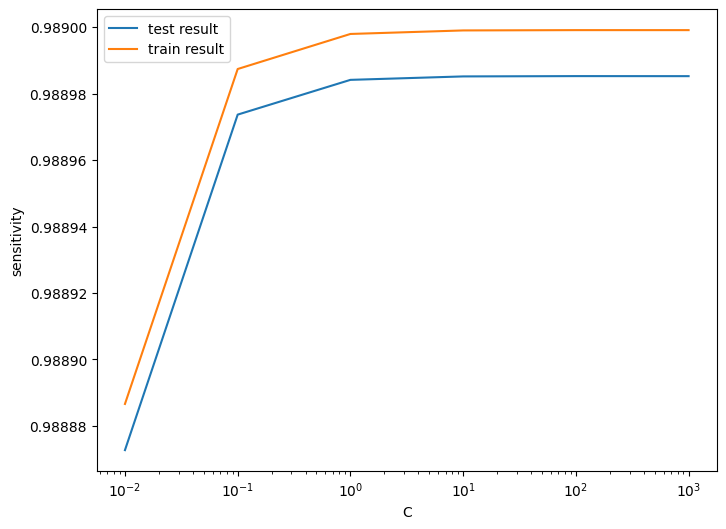

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
## Logistic Regression with optimal C
# Printing best params
model_cv.best_params_

{'C': 100}

In [ ]:
# Instantiating the model
logreg_smote_model = LogisticRegression(C=100)

# Fitting the model with balanced data
logreg_smote_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=100)

In [ ]:
# Evaluating on train data
y_train_pred = logreg_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 94.23%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.95      0.94      0.94    454902
weighted avg       0.95      0.94      0.94    454902



In [ ]:
# Evaluating on train data
y_train_pred = logreg_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 94.23%
Classification Report: 
               precision    recall  f1-score   support

           0       0.92      0.97      0.95    227451
           1       0.97      0.92      0.94    227451

    accuracy                           0.94    454902
   macro avg       0.95      0.94      0.94    454902
weighted avg       0.95      0.94      0.94    454902



In [ ]:
# Evaluating on test data
y_test_pred = logreg_smote_model.predict(X_test)
display_scores(y_test, y_test_pred)

F1 Score: 9.79%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.92      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.94      0.54     56962
weighted avg       1.00      0.97      0.98     56962



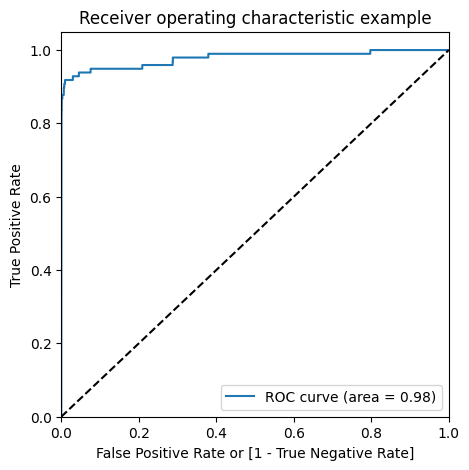

In [ ]:
# Predicted probability
y_test_pred_proba_smote = logreg_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba_smote)



<font color="Green" size="6">  Model Summary

### Train set
- ROC score : 99%
- F1 score: 94.23%

### Test set
- ROC score : 98%
- F1 score: 9.79%

<font color="GREEN" size="5"> Decision Tree on balanced data with SMOTE

In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 3,
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_smote,y_train_smote)

Fitting 3 folds for each of 8 candidates, totalling 24 fits


GridSearchCV(cv=3, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9976102568852075
DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50)


In [ ]:
## Model with optimal hyperparameters
grid_search.best_params_
dt_smote_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=50)

dt_smote_model.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=50,
                       random_state=100)

In [ ]:
# Predictions on the train set
y_train_pred_smote = dt_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred_smote)

F1 Score: 98.61%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99    227451
           1       0.99      0.99      0.99    227451

    accuracy                           0.99    454902
   macro avg       0.99      0.99      0.99    454902
weighted avg       0.99      0.99      0.99    454902



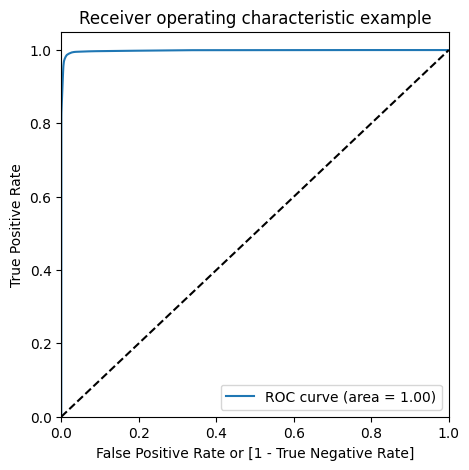

In [ ]:
# Predicted probability
y_train_pred_proba = dt_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [ ]:
# Evaluating model on the test data
y_pred = dt_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 15.62%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.09      0.85      0.16        98

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.57     56962
weighted avg       1.00      0.98      0.99     56962



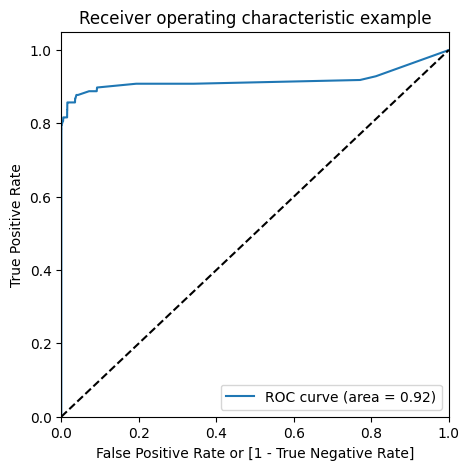

In [ ]:
# Predicted probability
y_test_pred_smote = dt_smote_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_smote)



<font color="Green" size="6">  Model Summary

### Train set
- ROC score : 100%
- F1 score: 98.61%
### Test set
- ROC score : 92%
- F1 score: 15.62%

<font color="GREEN" size="5"> <h3> XGBoost on balanced data with SMOTE

In [ ]:
# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_smote, y_train_smote)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,66.361496,0.882241,0.233616,0.045070,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.999563,0.999629,0.999578,0.999590,0.000028,4,0.999630,0.999636,0.999620,0.999629,0.000007
1,95.703972,1.329537,0.202850,0.004613,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.999529,0.999570,0.999548,0.999549,0.000016,5,0.999595,0.999571,0.999596,0.999587,0.000011
2,116.133822,0.360255,0.202830,0.005426,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.999519,0.999577,0.999538,0.999544,0.000024,6,0.999586,0.999595,0.999586,0.999589,0.000004
3,64.106527,0.865190,0.204620,0.009860,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.999919,0.999945,0.999931,0.999932,0.000011,3,0.999968,0.999971,0.999955,0.999964,0.000007
4,94.699461,0.999749,0.200502,0.007625,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.999945,0.999944,0.999938,0.999942,0.000003,1,0.999973,0.999970,0.999967,0.999970,0.000002
5,119.159323,1.487012,0.274302,0.098040,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.999937,0.999935,0.999940,0.999938,0.000002,2,0.999970,0.999966,0.999971,0.999969,0.000002


In [ ]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9999421576919624
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [ ]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.6}

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.6,
         'objective':'binary:logistic'}

# fit model on training data
xgb_smote_model = XGBClassifier(params = params)
xgb_smote_model.fit(X_train_smote, y_train_smote)


[22:07:41] WARNING: ../src/learner.cc:767: 
Parameters: { "params" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor=None, ...)

In [ ]:
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              random_state=0, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              subsample=1, tree_method='exact', validate_parameters=1,
              verbosity=None)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy=None, importance_type='gain',
              interaction_constraints='', learning_rate=0.300000012,
              max_bin=None, max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=0, max_depth=6, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.6},
              predictor=None, ...)

In [ ]:
y_train_pred = xgb_smote_model.predict(X_train_smote)
display_scores(y_train_smote, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227451

    accuracy                           1.00    454902
   macro avg       1.00      1.00      1.00    454902
weighted avg       1.00      1.00      1.00    454902



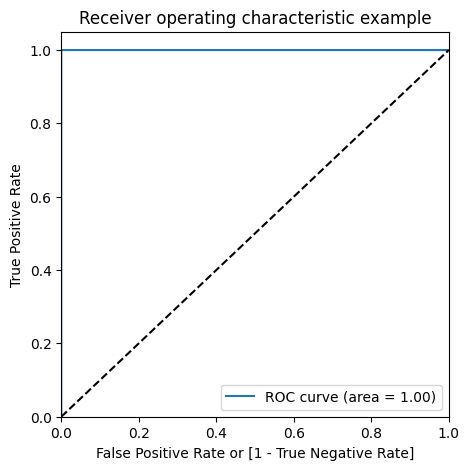

In [ ]:
# Predicted probability
y_train_pred_proba = xgb_smote_model.predict_proba(X_train_smote)[:,1]
# Plot the ROC curve
draw_roc(y_train_smote, y_train_pred_proba)

In [ ]:
y_pred = xgb_smote_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 80.95%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.76      0.87      0.81        98

    accuracy                           1.00     56962
   macro avg       0.88      0.93      0.90     56962
weighted avg       1.00      1.00      1.00     56962





<font color="Green" size="6">  Model Summary

### Train set
- ROC score : 100.0%
- F1 score: 100.0%
### Test set
- ROC score : 99%
- F1 score: 80.95%

<font color="GREEN" size="5"> ADASYN (Adaptive Synthetic Sampling)

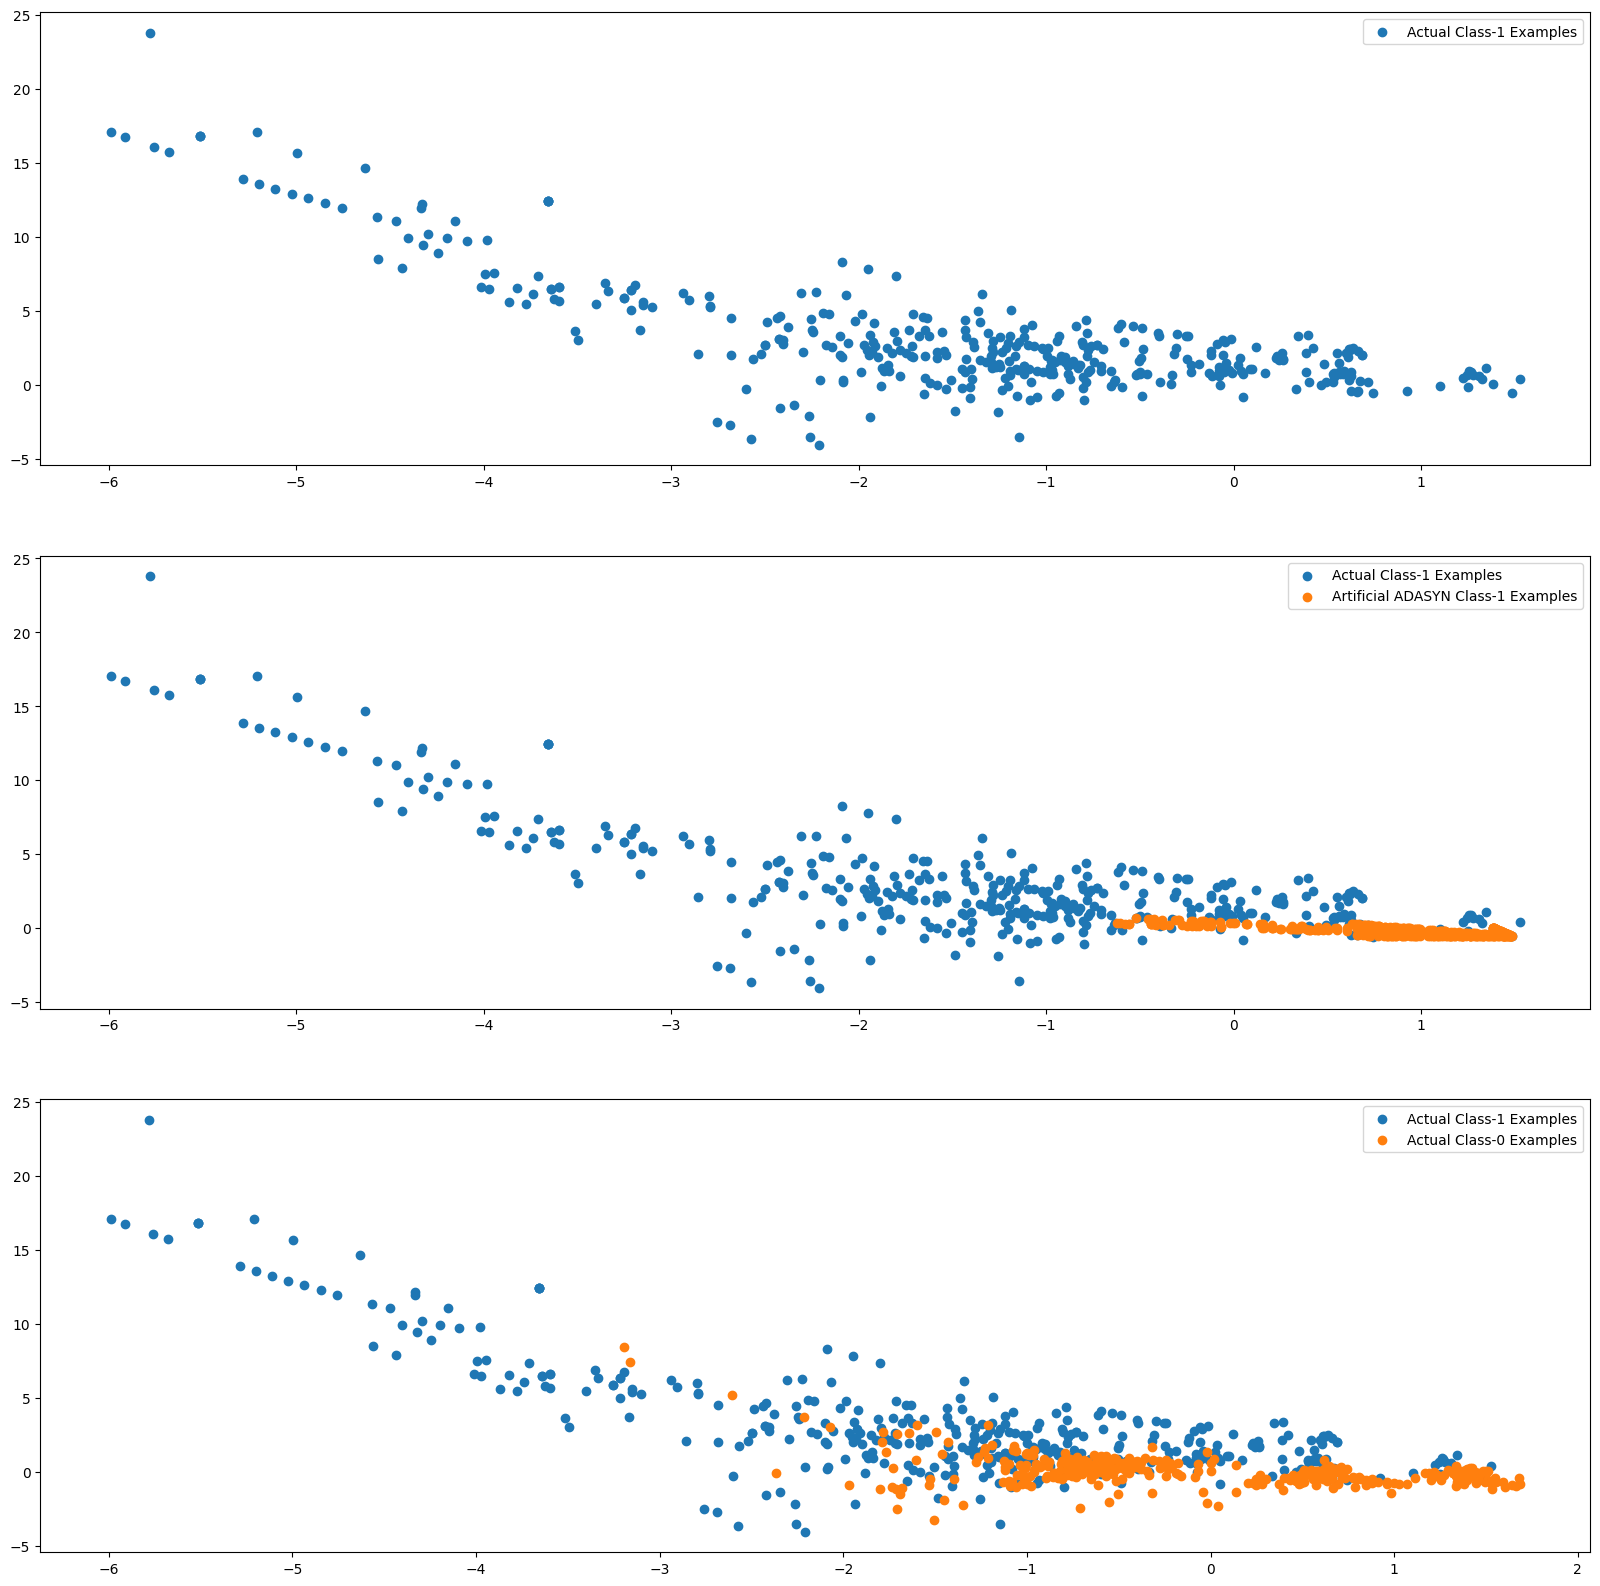

In [ ]:
import warnings
warnings.filterwarnings("ignore")

from imblearn import over_sampling

ada = over_sampling.ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = ada.fit_resample(X_train, y_train)
# Artificial minority samples and corresponding minority labels from ADASYN are appended
# below X_train and y_train respectively
# So to exclusively get the artificial minority samples from ADASYN, we do
X_train_adasyn_1 = X_train_adasyn[X_train.shape[0]:]

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]



import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]
fig = plt.figure()

plt.subplot(3, 1, 1)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 2)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_adasyn_1.iloc[:X_train_1.shape[0], 0], X_train_adasyn_1.iloc[:X_train_1.shape[0], 1],
            label='Artificial ADASYN Class-1 Examples')
plt.legend()

plt.subplot(3, 1, 3)
plt.scatter(X_train_1[:, 0], X_train_1[:, 1], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], 0], X_train_0[:X_train_1.shape[0], 1], label='Actual Class-0 Examples')
plt.legend()

<font color="GREEN" size="5"> Logistic Regression on balanced data with ADASYN

In [ ]:
# Creating KFold object with 3 splits
folds = KFold(n_splits=3, shuffle=True, random_state=4)

# Specify params
params = {"C": [0.01, 0.1, 1, 10, 100, 1000]}

# Specifing score as roc-auc
model_cv = GridSearchCV(estimator = LogisticRegression(),
                        param_grid = params,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# Fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)
#print the evaluation result by choosing a evaluation metric
print('Best ROC AUC score: ', model_cv.best_score_)
#print the optimum value of hyperparameters
print('Best hyperparameters: ', model_cv.best_params_)

Fitting 3 folds for each of 6 candidates, totalling 18 fits
Best ROC AUC score:  0.9616425510525373
Best hyperparameters:  {'C': 1000}


In [ ]:
# cross validation results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,1.679289,0.069971,0.064686,0.000840,0.01,{'C': 0.01},0.961204,0.961287,0.961636,0.961376,0.000187,6,0.961514,0.961242,0.961433,0.961396,0.000114
1,2.068590,0.486670,0.084217,0.029533,0.1,{'C': 0.1},0.961447,0.961530,0.961883,0.961620,0.000189,5,0.961765,0.961481,0.961674,0.961640,0.000119
2,1.703381,0.153787,0.064855,0.000766,1,{'C': 1},0.961468,0.961550,0.961903,0.961640,0.000188,4,0.961787,0.961501,0.961694,0.961661,0.000119
3,2.122715,0.474750,0.087820,0.033638,10,{'C': 10},0.961470,0.961552,0.961904,0.961642,0.000188,3,0.961789,0.961503,0.961695,0.961662,0.000119
4,1.576601,0.099729,0.063332,0.001880,100,{'C': 100},0.961471,0.961552,0.961904,0.961642,0.000188,2,0.961789,0.961504,0.961696,0.961663,0.000119
5,1.808877,0.391263,0.081943,0.028091,1000,{'C': 1000},0.961471,0.961552,0.961905,0.961643,0.000188,1,0.961789,0.961503,0.961696,0.961663,0.000119


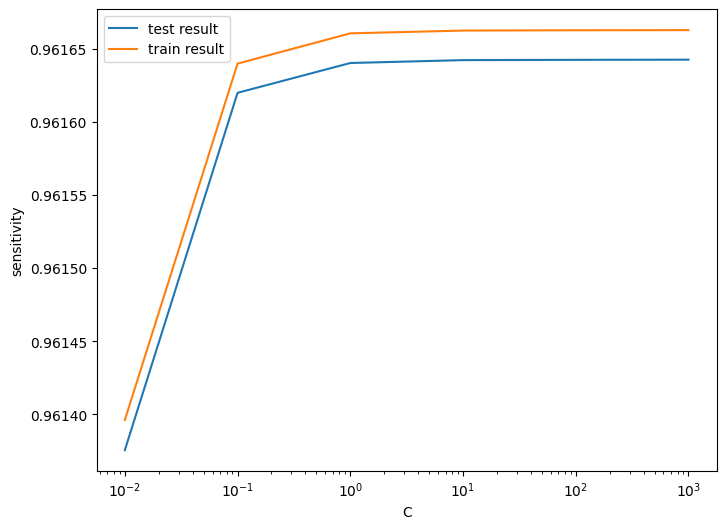

In [ ]:
# plot of C versus train and validation scores

plt.figure(figsize=(8, 6))
plt.plot(cv_results['param_C'], cv_results['mean_test_score'])
plt.plot(cv_results['param_C'], cv_results['mean_train_score'])
plt.xlabel('C')
plt.ylabel('sensitivity')
plt.legend(['test result', 'train result'], loc='upper left')
plt.xscale('log')

In [ ]:
model_cv.best_params_

{'C': 1000}

In [ ]:
# Instantiating the model
logreg_adasyn_model = LogisticRegression(C=1000)

# Fitting the model
logreg_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

LogisticRegression(C=1000)

In [ ]:
# Evaluating on test data
y_train_pred = logreg_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 89.2%
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.90      0.89    227451
           1       0.90      0.88      0.89    227434

    accuracy                           0.89    454885
   macro avg       0.89      0.89      0.89    454885
weighted avg       0.89      0.89      0.89    454885



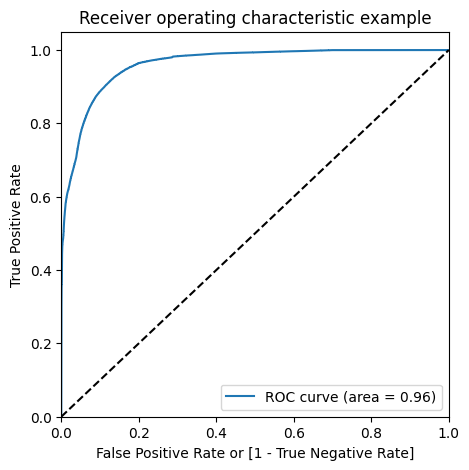

In [ ]:
# Predicted probability
y_train_pred_proba = logreg_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [ ]:
# Evaluating on test data
y_pred = logreg_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 3.23%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.90      0.95     56864
           1       0.02      0.95      0.03        98

    accuracy                           0.90     56962
   macro avg       0.51      0.93      0.49     56962
weighted avg       1.00      0.90      0.95     56962



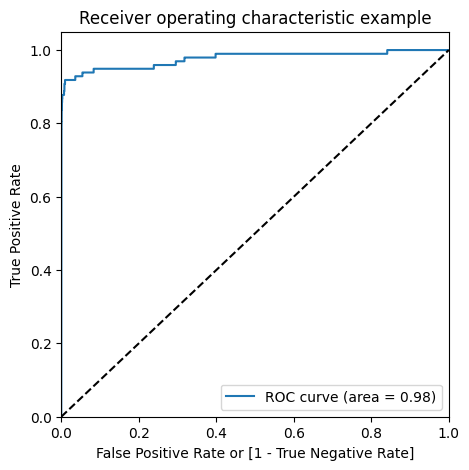

In [ ]:
# Predicted probability
y_test_pred_proba = logreg_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<font color="Green" size="6"> Model Summary

### Train set
- ROC score : 96%
- F1 score: 89.2%
### Test set
- ROC score : 98%
- F1 score: 3.23%

<font color="GREEN" size="5"> Decision Tree on balanced data with ADASYN


In [ ]:
# Create the parameter grid
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(50, 150, 50),
    'min_samples_split': range(50, 150, 50),
}


# Instantiate the grid search model
dtree = DecisionTreeClassifier()

grid_search = GridSearchCV(estimator = dtree,
                           param_grid = param_grid,
                           scoring= 'roc_auc',
                           cv = 5,
                           n_jobs=-1,
                           verbose = 1)

# Fit the grid search to the data
grid_search.fit(X_train_adasyn,y_train_adasyn)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(50, 150, 50),
                         'min_samples_split': range(50, 150, 50)},
             scoring='roc_auc', verbose=1)

In [ ]:
# Printing the optimal roc score and hyperparameters
print("Best roc auc score : ", grid_search.best_score_)
print(grid_search.best_estimator_)

Best roc auc score :  0.9411164924056697
DecisionTreeClassifier(max_depth=10, min_samples_leaf=100, min_samples_split=50)


In [ ]:
# Model with optimal hyperparameters
dt_adasyn_model = DecisionTreeClassifier(criterion = "gini",
                                  random_state = 100,
                                  max_depth=10,
                                  min_samples_leaf=50,
                                  min_samples_split=100)

dt_adasyn_model.fit(X_train_adasyn, y_train_adasyn)

DecisionTreeClassifier(max_depth=10, min_samples_leaf=50, min_samples_split=100,
                       random_state=100)

In [ ]:
# Evaluating model on the test data
y_train_pred = dt_adasyn_model.predict(X_train_adasyn)
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 97.79%
Classification Report: 
               precision    recall  f1-score   support

           0       0.99      0.96      0.98    227451
           1       0.96      1.00      0.98    227434

    accuracy                           0.98    454885
   macro avg       0.98      0.98      0.98    454885
weighted avg       0.98      0.98      0.98    454885



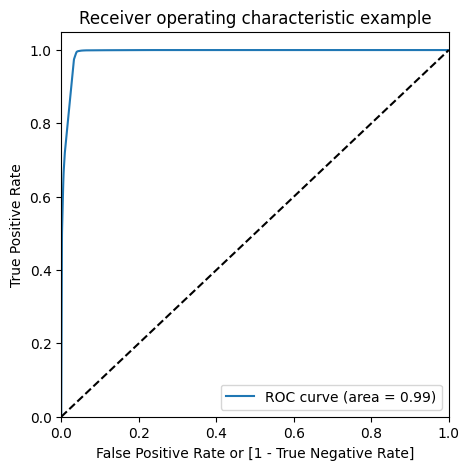

In [ ]:
# Predicted probability
y_train_pred_proba = dt_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [ ]:
# Evaluating model on the test data
y_pred = dt_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 7.05%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      0.96      0.98     56864
           1       0.04      0.90      0.07        98

    accuracy                           0.96     56962
   macro avg       0.52      0.93      0.52     56962
weighted avg       1.00      0.96      0.98     56962



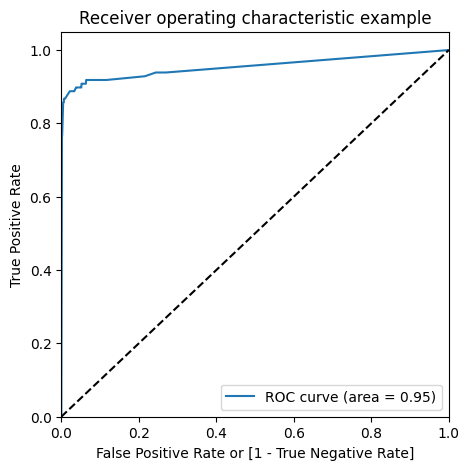

In [ ]:
# Predicted probability
y_test_pred_proba = dt_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<font color="Green" size="6"> Model Summary

### Train set
- ROC score : 99%
- F1 score: 97.79%

### Test set
- ROC score : 95%
- F1 score: 7.05%

<font color="GREEN" size="5"> XGBoost on balanced data with ADASYN

In [ ]:
# creating a KFold object
folds = 3

# specify range of hyperparameters
param_grid = {'learning_rate': [0.2, 0.6],
             'subsample': [0.3, 0.6, 0.9]}


# specify model
xgb_model = XGBClassifier(max_depth=2, n_estimators=200)

# set up GridSearchCV()
model_cv = GridSearchCV(estimator = xgb_model,
                        param_grid = param_grid,
                        scoring= 'roc_auc',
                        cv = folds,
                        verbose = 1,
                        return_train_score=True)

# fit the model
model_cv.fit(X_train_adasyn, y_train_adasyn)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=2,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=200, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'learning_rate': [0.2, 0.6],
                         'subsample': [0.3, 0.6, 0.9]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
# cv results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_learning_rate,param_subsample,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,66.564980,0.781869,0.210505,0.003647,0.2,0.3,"{'learning_rate': 0.2, 'subsample': 0.3}",0.984873,0.968837,0.996349,0.983353,0.011283,4,0.998965,0.999189,0.998847,0.999001,0.000142
1,98.717737,1.104383,0.209250,0.009689,0.2,0.6,"{'learning_rate': 0.2, 'subsample': 0.6}",0.982246,0.965539,0.996213,0.981333,0.012539,6,0.998978,0.999082,0.998864,0.998975,0.000089
2,119.915914,0.565099,0.219913,0.008326,0.2,0.9,"{'learning_rate': 0.2, 'subsample': 0.9}",0.982308,0.965918,0.996023,0.981416,0.012307,5,0.998945,0.999170,0.998787,0.998968,0.000157
3,65.359893,0.787959,0.210391,0.005417,0.6,0.3,"{'learning_rate': 0.6, 'subsample': 0.3}",0.994385,0.964377,0.998389,0.985717,0.015178,2,0.999931,0.999901,0.999906,0.999913,0.000013
4,97.740666,1.629518,0.202905,0.005104,0.6,0.6,"{'learning_rate': 0.6, 'subsample': 0.6}",0.989813,0.961604,0.999055,0.983491,0.015930,3,0.999906,0.999937,0.999913,0.999918,0.000013
5,117.795319,0.770301,0.203916,0.002963,0.6,0.9,"{'learning_rate': 0.6, 'subsample': 0.9}",0.992176,0.968189,0.999123,0.986496,0.013252,1,0.999943,0.999917,0.999909,0.999923,0.000015


In [ ]:
# Printing the optimal score and hyperparameters
print("Best roc auc score : ", model_cv.best_score_)
print(model_cv.best_estimator_)

Best roc auc score :  0.9864961701604956
XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.6, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=2, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=200, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, ...)


In [ ]:
model_cv.best_params_

{'learning_rate': 0.6, 'subsample': 0.9}

In [ ]:
# chosen hyperparameters
# 'objective':'binary:logistic' outputs probability rather than label, which we need for calculating auc
params = {'learning_rate': 0.6,
          'max_depth': 2,
          'n_estimators':200,
          'subsample':0.9,
          'objective':'binary:logistic'}

# Model with optimal hyperparameter
xgb_adasyn_model = XGBClassifier(params = params)
xgb_adasyn_model.fit(X_train_adasyn,y_train_adasyn)

[23:07:50] WARNING: ../src/learner.cc:767: 
Parameters: { "params" } are not used.



XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              params={'learning_rate': 0.6, 'max_depth': 2, 'n_estimators': 200,
                      'objective': 'binary:logistic', 'subsample': 0.9},
              predictor=None, ...)

In [ ]:
# Predicting on the train set
y_train_pred = xgb_adasyn_model.predict(X_train_adasyn)
# Printing the scores
display_scores(y_train_adasyn, y_train_pred)

F1 Score: 100.0%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    227451
           1       1.00      1.00      1.00    227434

    accuracy                           1.00    454885
   macro avg       1.00      1.00      1.00    454885
weighted avg       1.00      1.00      1.00    454885



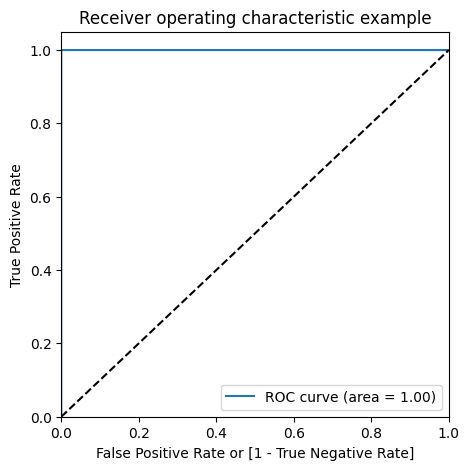

In [ ]:
# Predicted probability
y_train_pred_proba = xgb_adasyn_model.predict_proba(X_train_adasyn)[:,1]
# Plot the ROC curve
draw_roc(y_train_adasyn, y_train_pred_proba)

In [ ]:
y_pred = xgb_adasyn_model.predict(X_test)
display_scores(y_test, y_pred)

F1 Score: 81.16%
Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.77      0.86      0.81        98

    accuracy                           1.00     56962
   macro avg       0.89      0.93      0.91     56962
weighted avg       1.00      1.00      1.00     56962



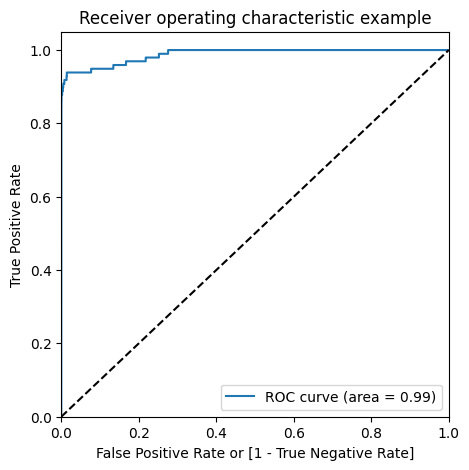

In [ ]:
# Predicted probability
y_test_pred_proba = xgb_adasyn_model.predict_proba(X_test)[:,1]
# Plot the ROC curve
draw_roc(y_test, y_test_pred_proba)

<font color="Green" size="6">  Model Summary

### Train set
- ROC score : 100.0%
- F1 score: 100.0%

Test set
- ROC score : 99%
- F1 score: 81.16%

<font color="GREEN" size="5"> Select the best result on a model <p>
- Executed Random Oversampling, SMOTE, and ADASYN technique to balance the dataset
- Modeling using logistic regression, random forest and XGBoost algorithms

<font color="BLUE" size="5"> **Conclusion: *XGBoost* model is performing well on the dataset which is balanced with AdaSyn technique.
Hence, we conclude that the XGBoost model with Adasyn is the best model.**

Top var = 14
2nd Top var = 4
3rd Top var = 8


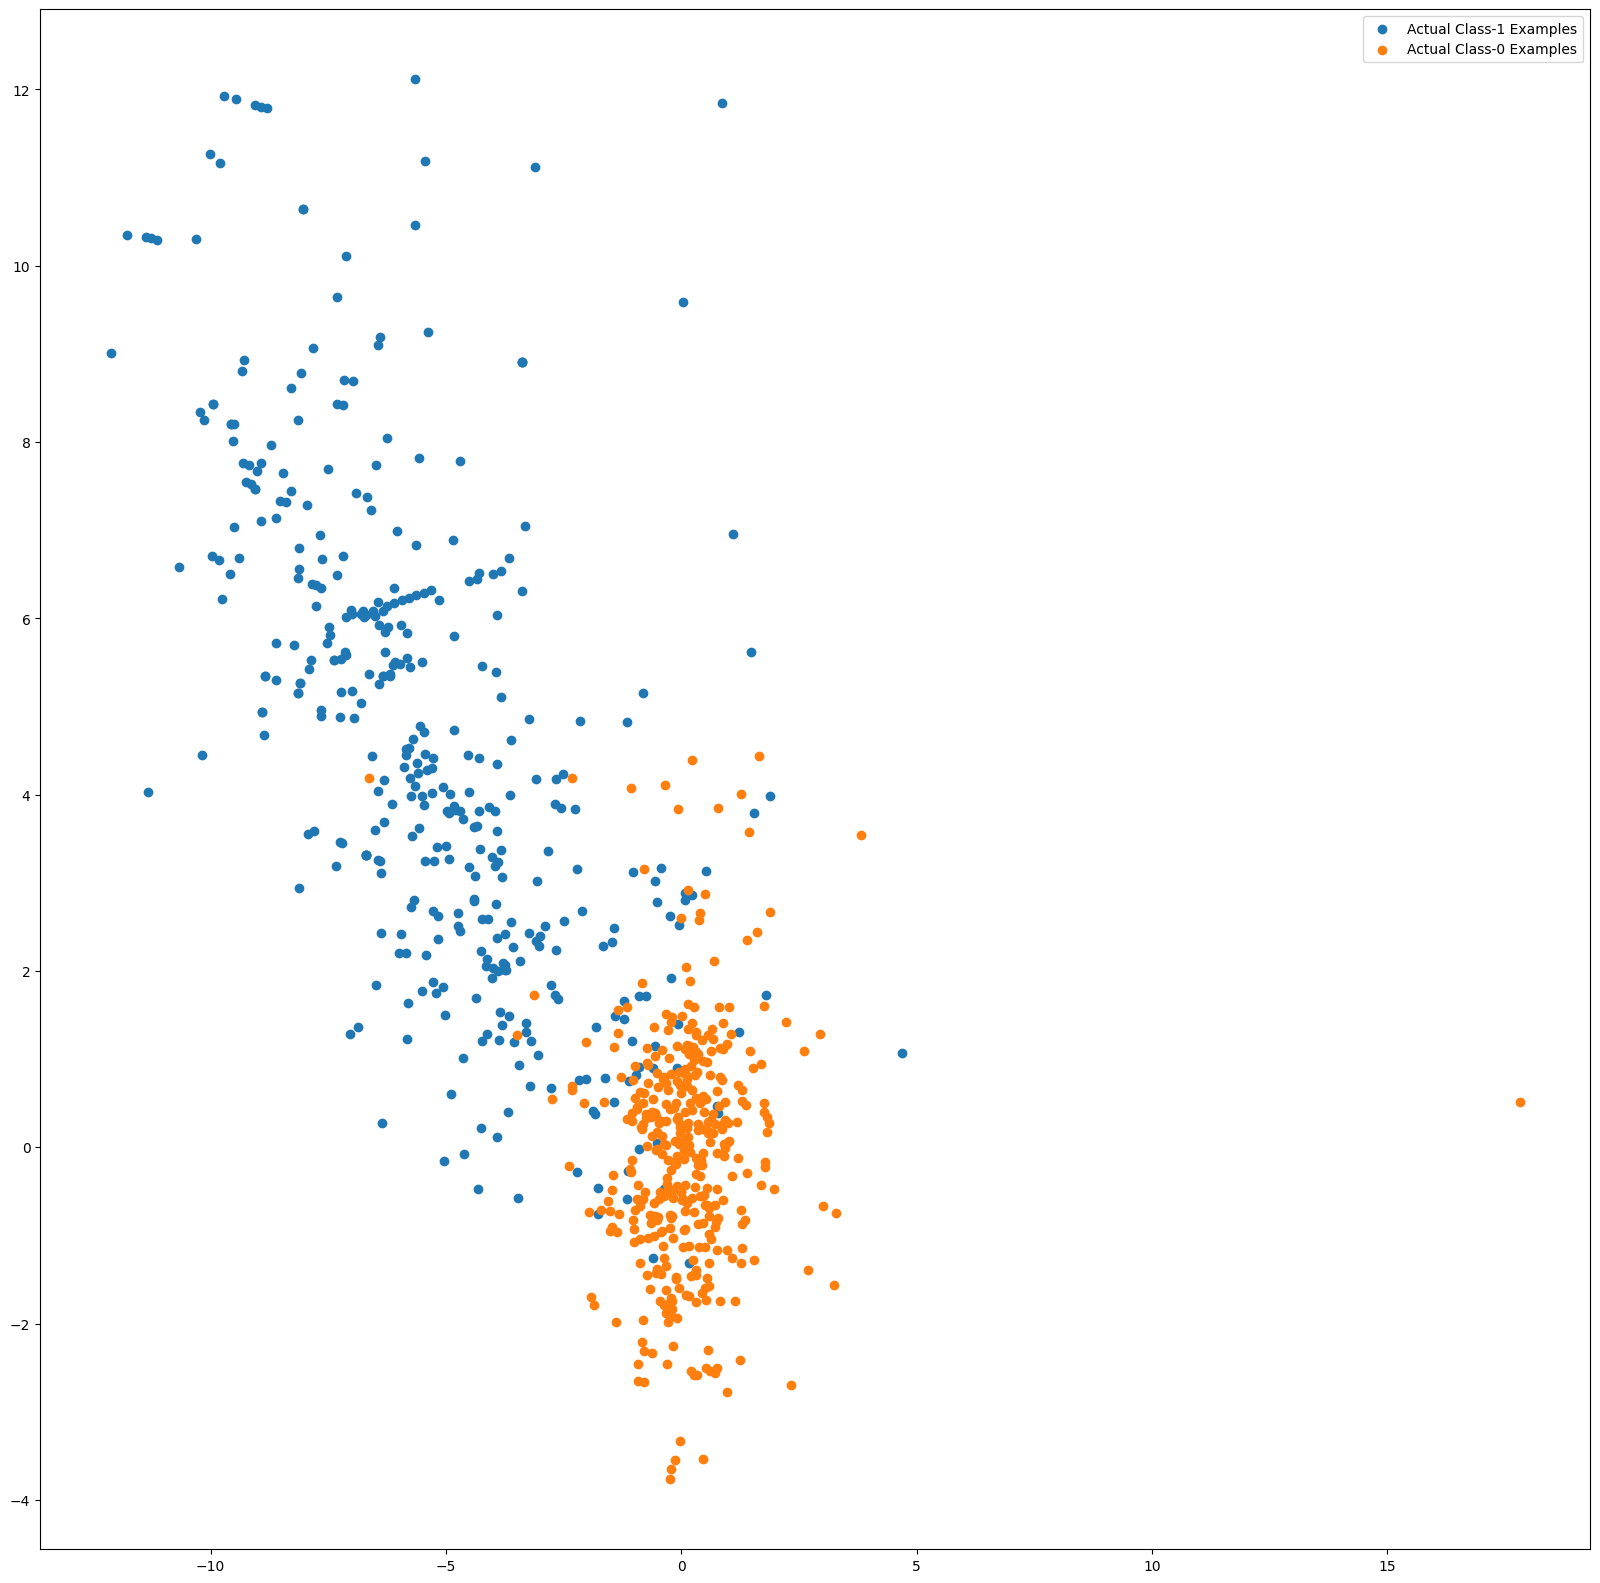

In [ ]:
var_imp = []
for i in xgb_adasyn_model.feature_importances_:
    var_imp.append(i)
print('Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])+1)
print('2nd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])+1)
print('3rd Top var =', var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-3])+1)

# Variable on Index-13 and Index-9 seems to be the top 2 variables
top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-1])
second_top_var_index = var_imp.index(np.sort(xgb_adasyn_model.feature_importances_)[-2])

X_train_1 = X_train.to_numpy()[np.where(y_train==1.0)]
X_train_0 = X_train.to_numpy()[np.where(y_train==0.0)]

np.random.shuffle(X_train_0)

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [20, 20]

plt.scatter(X_train_1[:, top_var_index], X_train_1[:, second_top_var_index], label='Actual Class-1 Examples')
plt.scatter(X_train_0[:X_train_1.shape[0], top_var_index], X_train_0[:X_train_1.shape[0], second_top_var_index],
            label='Actual Class-0 Examples')
plt.legend()

In [ ]:
print('Train auc =', metrics.roc_auc_score(y_train_adasyn, y_train_pred_proba))
fpr, tpr, thresholds = metrics.roc_curve(y_train_adasyn, y_train_pred_proba )
threshold = thresholds[np.argmax(tpr-fpr)]
print(threshold)

Train auc = 1.0
0.896811


<font color="BLUE" size="5"> ***Threshold: 89% at which TPR is the highest and FPR is the lowest and we get 100% ROC score on the train data.***



---
 > <font color="red" size="2"> End of Report
